<a href="https://colab.research.google.com/github/poojamalage/Machine-Learning-Project/blob/main/Fraudulent_Job_Posting_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <u><center><b>Predict Fraudulent Job Posts</b></center></u>

---

## <b> TEAM 2</b>
### Pooja Malage | Saranya Pandiaraj | Mercy Bose
###  DATA 245 | Machine Learning | May 2021


---

### YOUTUBE LINK - for Final Presentation by Saranya, Pooja and Mercy


https://www.youtube.com/watch?v=_uKrpXFlhSA

---------

<b> Disclaimer: This code was developed on Google colab. The version of Python was 3.7.10 on Colab when this project was developed </b>




----

The Fraudulent Job Posting Prediction dataset contains job descriptions. Around 800 of the 18K job descriptions are fake. <br/>
Both textual information and meta-information about the jobs are present in the dataset. <br/>
Classification models can be created to learn the fraudulent job descriptions and predict future fake jobs.

Data Set Source : Kaggle

https://www.kaggle.com/shivamb/real-or-fake-fake-jobposting-prediction

### <b> <u> Dataset Columns Description  </u> </b> </br>
<ol>
<i><b>title</b></i>:    The title of the job ad entry

<i><b>location</b></i>: Geographical location of the job ad.
 
<i><b>department</b></i>: Corporate department (e.g. sales).

<i><b>salary_range</b></i>: Indicative salary range (eg. 50000 to 60000)

<i><b>company_profile</b></i>:A brief company description.

<i><b>description</b></i>: The details description of the job ad.

<i><b>requirements</b></i>:Enlisted requirements for the job opening

<i><b>benefits</b></i>: Enlisted offered benefits by the employer.

<i><b>telecommuting</b></i>:True for telecommuting positions.

<i><b>Has_company_logo</b></i>: True if company logo is present.

<i><b>Has_questions</b></i>: True if screening questions are present.

<i><b>Employment_type</b></i>: Full-type, Part-time, Contract, etc.

<i><b>Required_experience</b></i>: Executive, Entry level, Intern, etc.

<i><b>Required_education</b></i>: Doctorate, Master’s Degree, Bachelor, etc.

<i><b>Industry</b></i>: Automotive, IT, Health care, Real estate, etc.    

<i><b>Function</b></i>: Consulting, Engineering, Research, Sales etc.

<i><b>Fraudulent</b></i>: target - Classification attribute.
</ol>


### <b> <u> Contents of Project : </u> </b> </br>

1) Importing Packages 

2) Reading Source Data 

3) Data Quality Report

4) Data Cleaning

5) Exploratory Data Visualizations 

6) Observations 




-------------------

### <u> <b> Importing Packages </b> </u>

In [ ]:
#Importing Libraries & Dependencies

!pip install langdetect

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


import matplotlib.gridspec as gridspec 

import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report, confusion_matrix
from wordcloud import WordCloud
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from sklearn.svm import SVC

import base64
import string
import re
from collections import Counter
from nltk.corpus import stopwords

import re
from langdetect import detect
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import sklearn

from sklearn.model_selection import cross_val_score



from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score ,recall_score,precision_score,f1_score

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re


     |████████████████████████████████| 983kB 5.0MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-cp37-none-any.whl size=993223 sha256=2f7f0d827d4a37e49361b28f5eb2c7130364d1529b9c3f9b81c2a29e18b4f9a4
  Stored in directory: /root/.cache/pip/wheels/7e/18/13/038c34057808931c7ddc6c92d3aa015cf1a498df5a70268996
Successfully built langdetect
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
#Setting Display option for rows & columns

pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 400)
pd.set_option('display.min_rows', 10)
pd.set_option('display.expand_frame_repr', True)



In [ ]:
# ****   DO NOT RUN THIS CELL WHILE EXECUTING   ****

# !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

In [ ]:
# ****   DO NOT RUN THIS CELL WHILE EXECUTING   ****

# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

# ## https://drive.google.com/file/d/1VEJ4Ueoj646Wd5QiHRlJFSmkT-F_QgEt/view?usp=sharing

# fileDownloaded = drive.CreateFile({'id':'1VEJ4Ueoj646Wd5QiHRlJFSmkT-F_QgEt'})
# fileDownloaded.GetContentFile('fake_job_postings.csv')

### <u> <b> Reading Source Data </b> </u>

In [ ]:
#Reading Files and storing in Dataframes

Fraud_Job_df = pd.read_csv('fake_job_postings.csv')


In [ ]:
#Identifying the no. of rows & cols
Fraud_Job_df.shape

(17880, 18)

-------------

## <u> <b> Data Quality Report </b> </u>

In [ ]:
Fraud_Job_df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [ ]:
Fraud_Job_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [ ]:
column=['description','requirements','employment_type' ,'required_experience' ,'required_education' ]

  

---






  It can be seen that there are both continuous and categorical features for 
the dataset. 


 <li><b>CONTINOUS Features</b> - 'job_id', 'telecommuting', 'has_company_logo', 'has_questions', 'fraudulent'</li>

  <li><b>CATEGORICAL Features</b> - 'title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits', 'employment_type', 'required_experience', 'required_education', 'industry', 'function'</li>


Based on this, we can explore and assess the data quality of the features


-----

### <u> <b> Assessing Data Quality: Continuous Columns </b> </u>



In [ ]:
COL_NAMES_CONTINUOUS = ['job_id','telecommuting', 'has_company_logo', 
                        'has_questions','fraudulent']


print("-" * 45)

def describe_continuous_cols(df, col_name):
  """
  Prints the description for the continuous column
  """
  print()
  print('\033[1m')
  print(f"Description for '{col_name}' column: ")
  print('\033[0m')
  print()
  print(df[col_name].describe())
  print(f"Cardinality: {len(pd.unique(df[col_name]))}")
  print()
  print("-" * 45)

for col in COL_NAMES_CONTINUOUS:
  describe_continuous_cols(Fraud_Job_df, col)

---------------------------------------------


Description for 'job_id' column: 


count    17880.000000
mean      8940.500000
std       5161.655742
min          1.000000
25%       4470.750000
50%       8940.500000
75%      13410.250000
max      17880.000000
Name: job_id, dtype: float64
Cardinality: 17880

---------------------------------------------


Description for 'telecommuting' column: 


count    17880.000000
mean         0.042897
std          0.202631
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: telecommuting, dtype: float64
Cardinality: 2

---------------------------------------------


Description for 'has_company_logo' column: 


count    17880.000000
mean         0.795302
std          0.403492
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: has_company_logo, dtype: float64
Cardinality: 2

---------------------------------------------



### <u> <b> Assessing Data Quality: Categorical Columns </b> </u>



In [ ]:
COL_NAMES_CATEGORICAL = ['title', 'location', 
                         'department', 'salary_range',
                         'company_profile', 'description', 'requirements',
                         'benefits', 'employment_type','required_experience'
                         , 'required_education', 'industry', 'function']

print("-" * 45)

def describe_categorical_cols(df, col_name):
  """
  Prints the description for the continuous column
  """
  print()
  print('\033[1m')
  print(f"Description for '{col_name}' column: ")
  print('\033[0m')
  print()  
  print(df[col_name].describe())
  print()
  print(df[col_name].value_counts())
  print()
  print("-" * 45)

for col in COL_NAMES_CATEGORICAL:
  describe_categorical_cols(Fraud_Job_df, col)

---------------------------------------------


Description for 'title' column: 


count                       17880
unique                      11231
top       English Teacher Abroad 
freq                          311
Name: title, dtype: object

English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
                                                     ... 
Appointment setter                                      1
Specialists Required New Zealand.                       1
Office Manager / HR                                     1
Trademark Legal Assistant                               1
Linux System Manager - SaaS                             1
Name: title, Length: 11231, dtype: int64

---------------------------------------------


Description for 'location

### <b> <u> Analysing the Data Quality and Proposing how to handle issues </u> <b>

 Based on the Data Quality report, Below observations can be made about the categorical and continous features

<b>CONTINOUS Features</b> 
  
  - <i><b>job_id</b></i> : 
    - Identity column 
        - Convert to index column

  - <i><b>telecommuting</b></i> 
    - Actually a boolean column but it is numeric here
      - Convert it to boolean column

  - <i><b>has_company_logo</b></i>
    - Actually a boolean column but it is numeric here
      - Convert it to boolean column

  - <i><b>has_questions</b></i>
    - Actually a boolean column but it is numeric here
      - Convert it to boolean column

  - <i><b>fraudulent</b></i>
    - Actually a boolean column but it is numeric here
      - Convert it to boolean column

<b>CATEGORICAL Features</b> 
  - <i><b>title</b></i>
    - Not a string column
      - Convert to string
  - <i><b>location</b></i>
    - Format is concatenated string -> Country, State, City
      - Split the column and create 3 new columns - Country, State, City
    - Handle missing values
      -  replace with 'Unspecified'

  - <i><b>department</b></i>
    - High percentage of missing values > 60%
      - Remove feature column

  - <i><b>salary_range</b></i>
    - High percentage of missing values > 60%
      - Remove feature column

  - <i><b>company_profile</b></i>
    -  &amp;, URLs, special characters values are present
      -  Remove all unwanted characters
    - Missing values -> 18.5%
      - Replace missing values with 'Unspecified'
    - Not a string column
      - Convert to string column


  - <i><b>description</b></i>
    -  &amp;, URLs, special characters values are present
      -  Remove all unwanted characters
    - Missing values -> 0.01%
      - Replace missing values with 'Unspecified'
    - Not a string column
      - Convert to string column

  - <i><b>requirements</b></i>
    -  &amp;, URLs, special characters values are present
      -  Remove all unwanted characters
    - Missing values -> 15%
      - Replace missing values with 'Unspecified'
    - Not a string column
      - Convert to string column

  - <i><b>benefits</b></i>
    -"See job description" - implies "description" value- can be replaced
      - If "See job description" is replaced to be same as description, then during concatenation of strings, there will be a duplicate
      So - how to handle this? Replace with empty? Replace with some other values? What are the implications of this?

    If missing values are there so that description needed to be considered, then the problem remains the same
    - Missing values -> 40% -> may be it implies description is enough?

    -Not a string column
      - Convert to string column
    -benefits and description columns are interchangeably used for some instances
      - Check and update for missing values if required

  - <i><b>employment_type</b></i>
    - Missing values
      - Since cardinality is low, check for values in requirements and description column to see if something matches
      full time, part time, temporary  (contract-not making sense)
      Example - 'full time' is matching in requirement

      - For further missing values, can be replaced with 'other'

      - Internship can be searched based on description values and a new field called Internship can be added or Temporary can be used
    
    -Not a string column
      - Convert to string column


  - <i><b>required_experience</b></i>
    - missing values
      - If blank and 'no minimum experience" -> change to 'Not applicable

      - If blank and 'entry level' is there, then change to  Entry level

      - If blank and 'experience' is there, then change to 'Mid-senior level' or Entry level

    -Not a string column
      - Convert to string column


  - <i><b>required_education</b></i>
    - Missing values
      - Look for values like 'high school', 'diploma, certification, degree, bachelors, masters in that order and keep replacing with proper values
    -Not a string column
      - Convert to string column

  - <i><b>industry</b></i>
    - Missing Values
      - Replace with 'Unspecified'
    -Not a string column
      - Convert to string column

  - <i><b>function</b></i>
    - Missing Values
        - Replace with 'Other'
    -Not a string column
      - Convert to string column
  

In [ ]:
#Displaying Data before Cleaning

Fraud_Job_df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0




## <u> <b> Data Cleaning </b> </u>

In [ ]:
#Dropping Duplicate Rows

Fraud_Job_df = Fraud_Job_df.drop_duplicates(keep="last")

In [ ]:
#Determining the Null Value Data

round(( Fraud_Job_df.isna().sum()/len(Fraud_Job_df) ) * 100).sort_values(ascending=False)

salary_range           84.0
department             65.0
required_education     45.0
benefits               40.0
required_experience    39.0
function               36.0
industry               27.0
company_profile        19.0
employment_type        19.0
requirements           15.0
location                2.0
title                   0.0
fraudulent              0.0
description             0.0
telecommuting           0.0
has_company_logo        0.0
has_questions           0.0
job_id                  0.0
dtype: float64

### <b><u> Data Cleaning - Continuous Column </u></b>

#### <b><u> Job_id </u></b>

In [ ]:
#Converting to index column

Fraud_Job_df = Fraud_Job_df.set_index('job_id')
Fraud_Job_df.head(5)

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
job_id,,,,,,,,,,,,,,,,,
1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0




---



#### <b><u> Telecommuting, Company Logo , Questions , Fraudulent</u></b>

<u>Converting the below Numerical Columns to bool type </u>



In [ ]:
#Describing the Stats of telecommuting,has_company_logo,has_questions,fraudulent Columns

Fraud_Job_df.describe()

,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000
mean,0.042897,0.795302,0.491723,0.048434
std,0.202631,0.403492,0.499945,0.214688
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Converting the below Numerical Columns to bool type
Fraud_Job_df['telecommuting'] = Fraud_Job_df['telecommuting'].astype('bool')
Fraud_Job_df['has_company_logo'] = Fraud_Job_df['has_company_logo'].astype('bool')
Fraud_Job_df['has_questions'] = Fraud_Job_df['has_questions'].astype('bool')
Fraud_Job_df['fraudulent'] = Fraud_Job_df['fraudulent'].astype('bool')

In [ ]:

Fraud_Job_df.describe()


,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
count,17880,17534,6333,2868,14572,17879,15185,10670,17880,17880,17880,14409,10830,9775,12977,11425,17880
unique,11231,3105,1337,874,1709,14801,11968,6205,2,2,2,5,7,13,131,37,2
top,English Teacher Abroad,"GB, LND, London",Sales,0-0,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,False,True,False,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,False
freq,311,718,551,142,726,379,410,726,17113,14220,9088,11620,3809,5145,1734,1749,17014




---



### <b><u> Data Cleaning - Categorical Column </u></b>

#### <b><u> Title </u></b>

In [ ]:
#Converting to String since it was not a string column

Fraud_Job_df["title"] = Fraud_Job_df["title"].astype("str")



<br/>

---






#### <b><u> Location</u></b>





In [ ]:
# Splitting the Location column and creating 3 new columns - Country, State, City

Fraud_Job_df['Country'] = Fraud_Job_df['location'].str.split(',').str[0]
Fraud_Job_df['State'] = Fraud_Job_df['location'].str.split(',').str[1]
Fraud_Job_df['City'] = Fraud_Job_df['location'].str.split(',').str[2]
Fraud_Job_df[['location','Country','State','City']]


,location,Country,State,City
job_id,,,,
1,"US, NY, New York",US,NY,New York
2,"NZ, , Auckland",NZ,,Auckland
3,"US, IA, Wever",US,IA,Wever
4,"US, DC, Washington",US,DC,Washington
5,"US, FL, Fort Worth",US,FL,Fort Worth
...,...,...,...,...
17876,"CA, ON, Toronto",CA,ON,Toronto
17877,"US, PA, Philadelphia",US,PA,Philadelphia
17878,"US, TX, Houston",US,TX,Houston


In [ ]:
#Checking for any missing values
col_1 = ['location','Country','State','City']
round(( Fraud_Job_df[col_1].isna().sum()/len(Fraud_Job_df) ) * 100).sort_values(ascending=False)

City        2.0
State       2.0
Country     2.0
location    2.0
dtype: float64

In [ ]:
# Missing/ Empty values - replacing with 'Unspecified'

Fraud_Job_df.replace(r'^\s*$', np.nan, regex=True, inplace= True)

col_1 = ['location','Country','State','City']
Fraud_Job_df[col_1] = Fraud_Job_df[col_1].fillna('Unspecified')

round(( Fraud_Job_df[col_1].isna().sum()/len(Fraud_Job_df) ) * 100).sort_values(ascending=False) 

City        0.0
State       0.0
Country     0.0
location    0.0
dtype: float64

In [ ]:
Fraud_Job_df['Country'].value_counts()

US             10656
GB              2384
GR               940
CA               457
DE               383
Unspecified      346
NZ               333
IN               276
AU               214
PH               132
NL               127
BE               117
IE               114
SG                80
HK                77
PL                76
IL                72
EE                72
FR                70
ES                66
AE                54
EG                52
SE                49
RO                46
DK                42
ZA                40
BR                36
IT                31
FI                29
PK                27
LT                23
QA                21
MY                21
RU                20
JP                20
PT                18
MX                18
TR                17
BG                17
CN                15
CH                15
SA                15
MU                14
HU                14
AT                14
ID                13
UA                13
MT           



---



#### <b><u> Department & Salary Range </u></b>

In [ ]:
#Checking for any missing values

round(( Fraud_Job_df[['department', 'salary_range']].isna().sum()/len(Fraud_Job_df) ) * 100).sort_values(ascending=False)

salary_range    84.0
department      65.0
dtype: float64

In [ ]:
#Removing the Feature Column since it has High percentage of missing values > 60%

Fraud_Job_df.drop(['department', 'salary_range'], axis=1, inplace=True)


<br/>

---



#### <b><u> Company Profile , Description, Benefits & Requirements </u></b>

In [ ]:
#Checking for any missing values
col_2 = ['company_profile','description','requirements','benefits']
round(( Fraud_Job_df[col_2].isnull().sum()/len(Fraud_Job_df) ) * 100).sort_values(ascending=False) 

benefits           40.0
company_profile    19.0
requirements       15.0
description         0.0
dtype: float64

In [ ]:
#Replacing missing values with 'Unspecified'

Fraud_Job_df[col_2] = Fraud_Job_df[col_2].fillna('Unspecified')
round(( Fraud_Job_df[col_2].isna().sum()/len(Fraud_Job_df) ) * 100).sort_values(ascending=False) 

benefits           0.0
requirements       0.0
description        0.0
company_profile    0.0
dtype: float64

In [ ]:
## Converting the below columns to String

Fraud_Job_df['description'] = Fraud_Job_df['description'].astype("str")
Fraud_Job_df['requirements'] = Fraud_Job_df['requirements'].astype("str")
Fraud_Job_df['company_profile'] = Fraud_Job_df['company_profile'].astype("str")
Fraud_Job_df['benefits'] = Fraud_Job_df['benefits'].astype("str")


#### <b><u> Employment Type, Required Experience, Required Education</u></b>

In [ ]:
#Checking for any missing values for the columns

print("Missing values for Employment Type")
print(round(( Fraud_Job_df['employment_type'].isnull().sum()/len(Fraud_Job_df) ) * 100))
print()

print("Missing values for Required Experience")
print(round(( Fraud_Job_df['required_experience'].isnull().sum()/len(Fraud_Job_df) ) * 100))
print()

print("Missing values for Required Education")
print(round(( Fraud_Job_df['required_education'].isnull().sum()/len(Fraud_Job_df) ) * 100))
print()

Missing values for Employment Type
19

Missing values for Required Experience
39

Missing values for Required Education
45



In [ ]:
print('\033[1m' + '\u0332'.join("VALUE COUNTS - Before removing NaN values") + '\033[0m')
print()
print('\033[1m' + "Employment Type- Value counts" + '\n' + '\033[0m')
print(Fraud_Job_df["employment_type"].value_counts())
print()
print( '\033[1m' + "Required Experience- Value counts" + '\n' + '\033[0m') 
print(Fraud_Job_df["required_experience"].value_counts())
print()
print('\033[1m' + "Required Education- Value counts" + '\n' + '\033[0m')
print(Fraud_Job_df["required_education"].value_counts())

V̲A̲L̲U̲E̲ ̲C̲O̲U̲N̲T̲S̲ ̲-̲ ̲B̲e̲f̲o̲r̲e̲ ̲r̲e̲m̲o̲v̲i̲n̲g̲ ̲N̲a̲N̲ ̲v̲a̲l̲u̲e̲s

Employment Type- Value counts

Full-time    11620
Contract      1524
Part-time      797
Temporary      241
Other          227
Name: employment_type, dtype: int64

Required Experience- Value counts

Mid-Senior level    3809
Entry level         2697
Associate           2297
Not Applicable      1116
Director             389
Internship           381
Executive            141
Name: required_experience, dtype: int64

Required Education- Value counts

Bachelor's Degree                    5145
High School or equivalent            2080
Unspecified                          1397
Master's Degree                       416
Associate Degree                      274
Certification                         170
Some College Coursework Completed     102
Professional                           74
Vocational                             49
Some High School Coursework            27
Doctorate                              26
Vocatio

In [ ]:
# Fill NULL or NaN values with '' for the columns

Fraud_Job_df['employment_type'] = Fraud_Job_df['employment_type'].fillna('')

Fraud_Job_df['required_experience'] = Fraud_Job_df['required_experience'].fillna('')

Fraud_Job_df['required_education'] = Fraud_Job_df['required_education'].fillna('')


In [ ]:
#Checking for any missing values for the columns

print('\033[1m' + '\u0332'.join("MISSING VALUES AFTER NaN values are handled") + '\033[0m')
print()
print('\033[1m' + "Missing values for Employment Type" + '\033[0m')
print(round(( Fraud_Job_df['employment_type'].isnull().sum()/len(Fraud_Job_df) ) * 100))
print()

print('\033[1m' + "Missing values for Required Experience" + '\033[0m')
print(round(( Fraud_Job_df['required_experience'].isnull().sum()/len(Fraud_Job_df) ) * 100))
print()

print('\033[1m' + "Missing values for Required Education" + '\033[0m')
print(round(( Fraud_Job_df['required_education'].isnull().sum()/len(Fraud_Job_df) ) * 100))
print()

M̲I̲S̲S̲I̲N̲G̲ ̲V̲A̲L̲U̲E̲S̲ ̲A̲F̲T̲E̲R̲ ̲N̲a̲N̲ ̲v̲a̲l̲u̲e̲s̲ ̲a̲r̲e̲ ̲h̲a̲n̲d̲l̲e̲d

Missing values for Employment Type
0

Missing values for Required Experience
0

Missing values for Required Education
0



In [ ]:
print('\033[1m' + '\u0332'.join("VALUE COUNTS - After removing NaN values") + '\033[0m')
print()
print('\033[1m' + "Employment Type- Value counts" + '\n' + '\033[0m')
print(Fraud_Job_df["employment_type"].value_counts())
print()
print('\033[1m' + "Required Experience- Value counts" + '\n' + '\033[0m')
print(Fraud_Job_df["required_experience"].value_counts())
print()
print('\033[1m' + "Required Education- Value counts" + '\n' + '\033[0m' )
print(Fraud_Job_df["required_education"].value_counts())

V̲A̲L̲U̲E̲ ̲C̲O̲U̲N̲T̲S̲ ̲-̲ ̲A̲f̲t̲e̲r̲ ̲r̲e̲m̲o̲v̲i̲n̲g̲ ̲N̲a̲N̲ ̲v̲a̲l̲u̲e̲s

Employment Type- Value counts

Full-time    11620
              3471
Contract      1524
Part-time      797
Temporary      241
Other          227
Name: employment_type, dtype: int64

Required Experience- Value counts

                    7050
Mid-Senior level    3809
Entry level         2697
Associate           2297
Not Applicable      1116
Director             389
Internship           381
Executive            141
Name: required_experience, dtype: int64

Required Education- Value counts

                                     8105
Bachelor's Degree                    5145
High School or equivalent            2080
Unspecified                          1397
Master's Degree                       416
Associate Degree                      274
Certification                         170
Some College Coursework Completed     102
Professional                           74
Vocational                             49
Some Hi

In [ ]:
#Converting the below columns to String Values

Fraud_Job_df['employment_type'] = Fraud_Job_df['employment_type'].astype(str)
Fraud_Job_df['required_experience'] = Fraud_Job_df['required_experience'].fillna('')
Fraud_Job_df['required_education'] = Fraud_Job_df['required_education'].fillna('')


In [ ]:
# Function to Transform all the empty rows to a desired values

def transform_row(single_row):

  concat_req_des = single_row["requirements"] + " " + single_row["description"] 
  emp_type = single_row["employment_type"].strip()
  req_exp = single_row["required_experience"].strip()
  req_edu = single_row["required_education"].strip()

  # If employment type is missing or is empty
  if len(emp_type) == 0:
    if (re.search(r'[fF]ull.[tT]ime',concat_req_des)):
      single_row["employment_type"] = "Full-time"
    elif (re.search(r'[pP]art.[tT]ime',concat_req_des )):
      single_row["employment_type"] = "Part-time"
    elif (re.search(r'[cC]ontract', concat_req_des)):
      single_row["employment_type"] = "Contract"
    elif (re.search(r'[tT]emporary', concat_req_des)):
      single_row["employment_type"] = "Temporary"
    elif (re.search(r'[iI]nternship',concat_req_des)):
      single_row["employment_type"] = "Internship"
    else:
      single_row["employment_type"] = "Unspecified"


  # if Required experience is empty

  if len(req_exp) == 0:
    if (re.search(r'[nN]o.[mM]inimum.[eE]xperience',concat_req_des)):
      single_row['required_experience'] = 'Not Applicable'
    elif (re.search(r'[eE]ntry.[lL]evel',concat_req_des)):
      single_row['required_experience'] = 'Entry level'
    elif (re.search(r'[eE]xperienced',concat_req_des)):
      single_row['required_experience'] = 'Mid-Senior level'
    elif (re.search(r'[dD]irector',concat_req_des)):
      single_row['required_experience'] = 'Director'
    elif (re.search(r'[iI]nternship',concat_req_des)):
      single_row['required_experience'] = 'Internship'
    elif (re.search(r'[eE]xecutive',concat_req_des)):
      single_row['required_experience'] = 'Executive'
    elif (re.search(r'[aA]ssociate',concat_req_des)):      
      single_row['required_experience'] = 'Associate'
    elif (re.search(r'[Mm]id.[Ss]enior.[lL]evel',concat_req_des)):
      single_row['required_experience'] = 'Mid-Senior level'
    else:
      single_row["required_experience"] = "Unspecified"

    # If Required Education is missing/empty

  if len(req_edu) == 0:
    if (re.search(r'[hH]igh*school',concat_req_des)):
      single_row['required_education'] = 'High School or equivalent'
    elif (re.search(r'[hH][sS].[dD]iploma',concat_req_des)):
      single_row['required_education'] = 'Vocational - HS Diploma'
    elif (re.search(r'[cC]ertification',concat_req_des)):
      single_row['required_education'] = 'Certification'
    elif (re.search(r'[bB]achelor',concat_req_des)):
      single_row['required_education'] = 'Bachelor\'s Degree'
    elif (re.search(r'[mM]aster',concat_req_des)):
      single_row['required_education'] = 'Master\'s Degree'
    elif (re.search(r'[dD]egree',concat_req_des)):
      single_row['required_education'] = 'Associate Degree'
    elif (re.search(r'[Vv]ocational',concat_req_des)):
      single_row['required_education'] = 'Vocational'
    elif (re.search(r'[Pp]rofessional',concat_req_des)):
      single_row['required_education'] = 'Professional'
    elif (re.search(r'[Cc]oursework',concat_req_des)):      
      single_row['required_education'] = 'Some College Coursework Completed'
    elif (re.search(r'[Dd]iploma',concat_req_des)):
      single_row['required_education'] = 'Diploma'
    else:
      single_row["required_education"] = "Unspecified"

  return single_row

# Transform all rows for employment type, required experience, required education 
Fraud_Job_df = Fraud_Job_df.apply(transform_row,axis=1)


In [ ]:

print('\033[1m' + '\u0332'.join("VALUE COUNTS - After Preprocessing") + '\033[0m')
print()
print('\033[1m' + "Employment Type- Value counts" + '\n' + '\033[0m')
print(Fraud_Job_df["employment_type"].value_counts())
print()
print('\033[1m' + "Required Experience- Value counts" + '\n' + '\033[0m')
print(Fraud_Job_df["required_experience"].value_counts())
print()
print('\033[1m' + "Required Education- Value counts" + '\n' + '\033[0m')
print(Fraud_Job_df["required_education"].value_counts())

V̲A̲L̲U̲E̲ ̲C̲O̲U̲N̲T̲S̲ ̲-̲ ̲A̲f̲t̲e̲r̲ ̲P̲r̲e̲p̲r̲o̲c̲e̲s̲s̲i̲n̲g

Employment Type- Value counts

Full-time      12035
Unspecified     2534
Contract        1772
Part-time        879
Temporary        375
Other            227
Internship        58
Name: employment_type, dtype: int64

Required Experience- Value counts

Unspecified         5147
Mid-Senior level    4624
Entry level         2820
Associate           2559
Not Applicable      1155
Director             712
Internship           475
Executive            388
Name: required_experience, dtype: int64

Required Education- Value counts

Bachelor's Degree                    5895
Unspecified                          5805
High School or equivalent            2080
Associate Degree                     1251
Professional                         1220
Master's Degree                       685
Certification                         530
Diploma                               146
Some College Coursework Completed     106
Vocational                  



---



#### <b><u> Industry & Function</u></b>

In [ ]:
#Checking for any missing values
col_3 = ['industry','function']
round(( Fraud_Job_df[col_3].isnull().sum()/len(Fraud_Job_df) ) * 100).sort_values(ascending=False) 

function    36.0
industry    27.0
dtype: float64

In [ ]:
#Replacing missing values with 'Unspecified' for Industry

Fraud_Job_df['industry'] = Fraud_Job_df['industry'].fillna('Unspecified')

#Replacing missing values with 'Other' for Function

Fraud_Job_df['function'] = Fraud_Job_df['function'].fillna('Other')

# Re-Checking the Null Values
round(( Fraud_Job_df[col_3].isna().sum()/len(Fraud_Job_df) ) * 100).sort_values(ascending=False) 

function    0.0
industry    0.0
dtype: float64

In [ ]:
column=['']
print(Fraud_Job_df.iloc[[1409], [5,6,11,12,13]])

                                                 benefits  telecommuting  \
job_id                                                                     
1410    A friendly work environment with young and ope...          False   

       required_education            industry     function  
job_id                                                      
1410    Bachelor's Degree  Financial Services  Engineering  




---



#### <b><u> Textual Preprocessing : Title,Company Profile , Description, Benefits & Requirements </u></b>

In [ ]:

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# function to remove non-ASCII 
def remove_non_ascii(text): 
    ret = []
    for i in text:
        if ord(i) < 128:            
            ret.append(i)
        else:
            ret.append("")
    return ''.join(ret)

    
def tokenise_text(txt):

  tokenizer = RegexpTokenizer(r'\w+')
  tokens = tokenizer.tokenize(txt)  
  filtered_words = [w for w in tokens if len(w) > 2 and w not in STOP_WORDS]
  non_ascii_removed = [remove_non_ascii(w) for w in filtered_words]
  #stem_words=[stemmer.stem(w) for w in non_ascii_removed]
  #lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]

  return " ".join(non_ascii_removed)

def preprocess_column(df,col_name):

  df[col_name] = df[col_name].apply(lambda x: x.replace("nan",""))
  df[col_name] = df[col_name].apply(lambda x: x.strip().lower())
  df[col_name] = df[col_name].apply(lambda x: x.replace('{html}',""))

  reg_obj = re.compile('&[a-zA-Z0-9]*;|[0-9]+|http\S+|<.*?>')

  df[col_name] = df[col_name].apply(lambda x: re.sub(reg_obj, '', x))

  df[col_name] = df[col_name].apply(tokenise_text)

  return df[col_name]

  

In [ ]:

COL_LIST_TXT_PREPROCESSING=['title', 'location', 
       'company_profile', 'description', 'requirements', 'benefits',
       'employment_type',
       'required_experience', 'required_education', 'industry', 'function']

for col in COL_LIST_TXT_PREPROCESSING:
  print(f"BEGIN: Textual Preprocessing for '{col}' column")
  preprocess_column(Fraud_Job_df, col)
  print(f"END: Textual Preprocessing for '{col}' column")
  print()

BEGIN: Textual Preprocessing for 'title' column
END: Textual Preprocessing for 'title' column

BEGIN: Textual Preprocessing for 'location' column
END: Textual Preprocessing for 'location' column

BEGIN: Textual Preprocessing for 'company_profile' column
END: Textual Preprocessing for 'company_profile' column

BEGIN: Textual Preprocessing for 'description' column
END: Textual Preprocessing for 'description' column

BEGIN: Textual Preprocessing for 'requirements' column
END: Textual Preprocessing for 'requirements' column

BEGIN: Textual Preprocessing for 'benefits' column
END: Textual Preprocessing for 'benefits' column

BEGIN: Textual Preprocessing for 'employment_type' column
END: Textual Preprocessing for 'employment_type' column

BEGIN: Textual Preprocessing for 'required_experience' column
END: Textual Preprocessing for 'required_experience' column

BEGIN: Textual Preprocessing for 'required_education' column
END: Textual Preprocessing for 'required_education' column

BEGIN: Textua

### <b> <u>Rechecking data after data cleaning </u></b>

In [ ]:
#Re-checking the Null Value Data after cleansing

round(( Fraud_Job_df.isna().sum()/len(Fraud_Job_df) ) * 100).sort_values(ascending=False)

City                   0.0
State                  0.0
location               0.0
company_profile        0.0
description            0.0
requirements           0.0
benefits               0.0
telecommuting          0.0
has_company_logo       0.0
has_questions          0.0
employment_type        0.0
required_experience    0.0
required_education     0.0
industry               0.0
function               0.0
fraudulent             0.0
Country                0.0
title                  0.0
dtype: float64

In [ ]:
#Data after cleaning

Fraud_Job_df.head(20)

,title,location,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,Country,State,City
job_id,,,,,,,,,,,,,,,,,,
1,marketing intern,new york,food created groundbreaking award winning cook...,food fast growing james beard award winning on...,experience content management systems major pl...,unspecified,False,True,False,,internship,unspecified,unspecified,marketing,False,US,NY,New York
2,customer service cloud video production,auckland,seconds worlds cloud video production service ...,organised focused vibrant awesome passion cust...,expect key responsibility communicate client s...,usthrough seconds team gain experience working...,False,True,False,time,applicable,professional,marketing advertising,customer service,False,NZ,Unspecified,Auckland
3,commissioning machinery assistant cma,wever,valor services provides workforce solutions me...,client located houston actively seeking experi...,implement pre commissioning commissioning proc...,unspecified,False,True,False,contract,mid senior level,certification,unspecified,,False,US,IA,Wever
4,account executive washington,washington,passion improving quality life geography heart...,company esri environmental systems research in...,education bachelor master gis business adminis...,culture corporate collaborative creative envir...,False,True,False,time,mid senior level,bachelor degree,computer software,sales,False,US,DC,Washington
5,bill review manager,fort worth,spotsource solutions llc global human capital ...,job title itemization review managerlocation f...,qualifications license state texasdiploma bach...,benefits offered,False,True,True,time,mid senior level,bachelor degree,hospital health care,health care provider,False,US,FL,Fort Worth
6,accounting clerk,,unspecified,job overviewapex environmental consulting firm...,unspecified,unspecified,False,False,False,unspecified,unspecified,associate degree,unspecified,,False,US,MD,Unspecified
7,head content,berlin,founded fonpit rose international web portal a...,responsibilities manage english speaking edito...,know university college degree journalism medi...,benefits fast growing company booming industry...,False,True,True,time,mid senior level,master degree,online media,management,False,DE,BE,Berlin
8,lead guest service specialist,san francisco,airenvy mission provide lucrative hassle free ...,airenvy hey seasoned entrepreneurs heart san f...,experience crm software live chat phones inclu...,competitive pay able eat steak everyday choose...,False,True,True,unspecified,unspecified,unspecified,unspecified,,False,US,CA,San Francisco
9,bsm sme,pensacola,solutions woman owned small business focus ser...,implementation configuration testing training ...,citizen active sci clearance required addition...,unspecified,False,True,True,time,associate,unspecified,information technology services,,False,US,FL,Pensacola


In [ ]:
#After Cleaning - Count
Fraud_Job_df.shape

(17880, 18)

In [ ]:
Fraud_Job_df.head(5)

,title,location,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,Country,State,City
job_id,,,,,,,,,,,,,,,,,,
1,marketing intern,new york,food created groundbreaking award winning cook...,food fast growing james beard award winning on...,experience content management systems major pl...,unspecified,False,True,False,,internship,unspecified,unspecified,marketing,False,US,NY,New York
2,customer service cloud video production,auckland,seconds worlds cloud video production service ...,organised focused vibrant awesome passion cust...,expect key responsibility communicate client s...,usthrough seconds team gain experience working...,False,True,False,time,applicable,professional,marketing advertising,customer service,False,NZ,Unspecified,Auckland
3,commissioning machinery assistant cma,wever,valor services provides workforce solutions me...,client located houston actively seeking experi...,implement pre commissioning commissioning proc...,unspecified,False,True,False,contract,mid senior level,certification,unspecified,,False,US,IA,Wever
4,account executive washington,washington,passion improving quality life geography heart...,company esri environmental systems research in...,education bachelor master gis business adminis...,culture corporate collaborative creative envir...,False,True,False,time,mid senior level,bachelor degree,computer software,sales,False,US,DC,Washington
5,bill review manager,fort worth,spotsource solutions llc global human capital ...,job title itemization review managerlocation f...,qualifications license state texasdiploma bach...,benefits offered,False,True,True,time,mid senior level,bachelor degree,hospital health care,health care provider,False,US,FL,Fort Worth




---



In [ ]:
#Checking the preprocessed text
Fraud_Job_df[COL_LIST_TXT_PREPROCESSING]

,title,location,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function
job_id,,,,,,,,,,,
1,marketing intern,new york,food created groundbreaking award winning cook...,food fast growing james beard award winning on...,experience content management systems major pl...,unspecified,,internship,unspecified,unspecified,marketing
2,customer service cloud video production,auckland,seconds worlds cloud video production service ...,organised focused vibrant awesome passion cust...,expect key responsibility communicate client s...,usthrough seconds team gain experience working...,time,applicable,professional,marketing advertising,customer service
3,commissioning machinery assistant cma,wever,valor services provides workforce solutions me...,client located houston actively seeking experi...,implement pre commissioning commissioning proc...,unspecified,contract,mid senior level,certification,unspecified,
4,account executive washington,washington,passion improving quality life geography heart...,company esri environmental systems research in...,education bachelor master gis business adminis...,culture corporate collaborative creative envir...,time,mid senior level,bachelor degree,computer software,sales
5,bill review manager,fort worth,spotsource solutions llc global human capital ...,job title itemization review managerlocation f...,qualifications license state texasdiploma bach...,benefits offered,time,mid senior level,bachelor degree,hospital health care,health care provider
...,...,...,...,...,...,...,...,...,...,...,...
17876,account director distribution,toronto,vend looking awesome new talent come join work...,case time visited website vend award winning w...,ace role eat comprehensive statements work bre...,expect open culture openly share results input...,time,mid senior level,master degree,computer software,sales
17877,payroll accountant,philadelphia,weblinc commerce platform services provider fa...,payroll accountant focus primarily payroll fun...,accounting desire fun love genuine passion acc...,health wellnessmedical planprescription drug p...,time,mid senior level,bachelor degree,internet,accounting auditing
17878,project cost control staff engineer cost contr...,houston,provide time permanent positions medium large ...,experienced project cost control staff enginee...,years professional experience ability work div...,unspecified,time,mid senior level,associate degree,unspecified,


## <u> <b>Exploratory Data Visualization</b> </u>



In [ ]:
# combine text in a single column to start cleaning our data


Fraud_Job_df['Concat_Strings']=Fraud_Job_df['title'] + ' '+Fraud_Job_df['location']+' '+ \
                     Fraud_Job_df['company_profile']+' '+ \
                     Fraud_Job_df['description']+' '+Fraud_Job_df['requirements']+ \
                     ' '+Fraud_Job_df['benefits']


#Fraud_Job_df['Concat_Strings'] = Fraud_Job_df['title']+' '+ Fraud_Job_df['description']


# Convert column to string
Fraud_Job_df['Concat_Strings'] = Fraud_Job_df['Concat_Strings'].astype('str')


### <b> <u> Word Cloud for Fraudulent jobs </u></b>

We can see that most common words seen as part of description or title are-


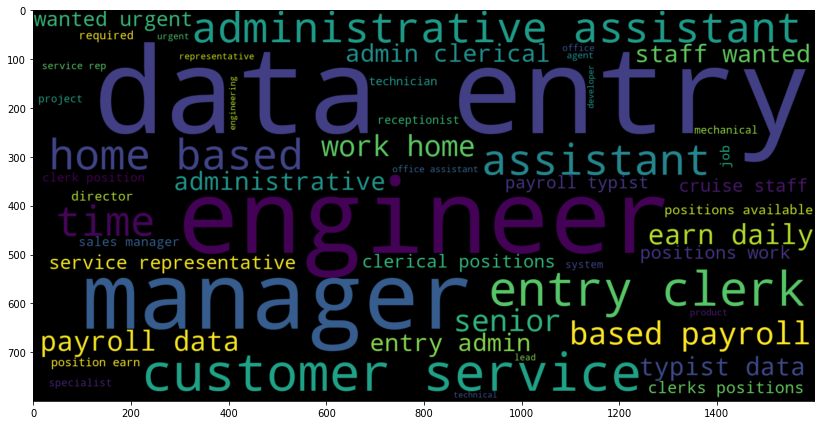

In [ ]:

Fraud_Job_df['req_desc']=Fraud_Job_df['description']+' '+Fraud_Job_df['requirements']

# Separate fraud and actual jobs
fraudjobs_text = Fraud_Job_df[Fraud_Job_df.fraudulent==1]["title"]
actualjobs_text = Fraud_Job_df[Fraud_Job_df.fraudulent==0]["title"]


# Fraudulent jobs word cloud
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize = (14,12))
fraudjobs_word_cloud = WordCloud(min_font_size = 3,  max_words = 50 , width = 1600 , \
               height = 800 ).generate(str(" ".join(fraudjobs_text)))
plt.rcParams["axes.grid"] = False

plt.imshow(fraudjobs_word_cloud,interpolation = 'bilinear')


### <b> <u> Word Cloud for Non-Fraudulent jobs </u> </b>

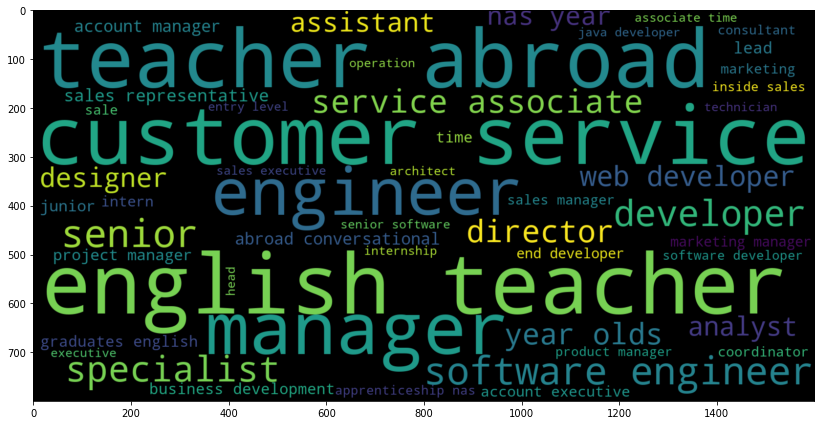

In [ ]:
# Plot Word Cloud for actual jobs
plt.figure(figsize = (14,12))
actualjobs_word_cloud = WordCloud(min_font_size = 3,  max_words = 50 , width = 1600 \
                , height = 800 \
                , stopwords = STOPWORDS).generate(" ".join(actualjobs_text))
plt.rcParams["axes.grid"] = False
plt.imshow(actualjobs_word_cloud,interpolation = 'bilinear')

In [ ]:
# combine text in a single column to start cleaning our data


Fraud_Job_df['Concat_Strings'] =  Fraud_Job_df['title'] + " " + Fraud_Job_df['description']


# Convert column to string
Fraud_Job_df['Concat_Strings'] = Fraud_Job_df['Concat_Strings'].astype('str')



### <b> <u> Target Feature (Fraudulent)  </u> </b>

In [ ]:
Fraud_Job_df.groupby('fraudulent')['fraudulent'].count()

fraudulent
False    17014
True       866
Name: fraudulent, dtype: int64

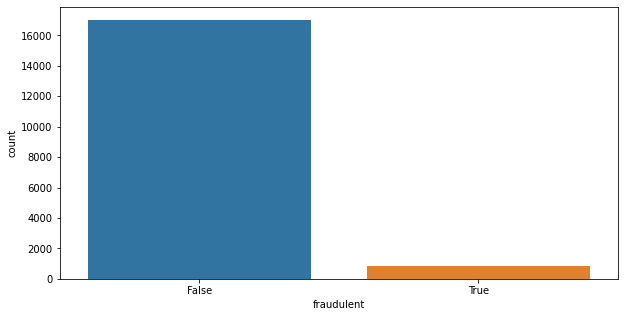

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='fraudulent',data=Fraud_Job_df)
plt.show()

From the above graph, we can infer that   

<b><i>
              
*   The data is very imbalanced between the actual and fake jobs.
*   Fraudulent job promotion postings are prevasive but are overshadowed by the real ads.
             
</i></b>



---



In [ ]:
len(Fraud_Job_df)

Fraud_Job_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17880 entries, 1 to 17880
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   location             17880 non-null  object
 2   company_profile      17880 non-null  object
 3   description          17880 non-null  object
 4   requirements         17880 non-null  object
 5   benefits             17880 non-null  object
 6   telecommuting        17880 non-null  bool  
 7   has_company_logo     17880 non-null  bool  
 8   has_questions        17880 non-null  bool  
 9   employment_type      17880 non-null  object
 10  required_experience  17880 non-null  object
 11  required_education   17880 non-null  object
 12  industry             17880 non-null  object
 13  function             17880 non-null  object
 14  fraudulent           17880 non-null  bool  
 15  Country              17880 non-null  object
 16  Stat

In [ ]:
#Function for column distribution based on Target Variable
def distribution_vis(col) :

    fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(25, 5), dpi=100)
    real = Fraud_Job_df[Fraud_Job_df["fraudulent"]==False][col]

    sns.countplot(y=real, ax=ax1, order=real.value_counts()[:5].index,orient='h') 
    ax1.set_xlabel('Count', fontsize=13, fontweight='bold') 
    ax1.set_title(f'{col} Distribution - Real Jobs', fontsize=11, fontweight='bold') 
    
    ax1.set_ylabel(f'', fontsize=13, fontweight='bold')
  
    
    fake = Fraud_Job_df[Fraud_Job_df["fraudulent"]==True][col]
    sns.countplot(y=fake,  ax=ax2, order=fake.value_counts()[:5].index, orient='h') 
    ax2.set_xlabel('Count', fontsize=13, fontweight='bold') 
    ax2.set_title(f'{col} Distribution - Fake Jobs', fontsize=11, fontweight='bold') 
    ax2.set_ylabel(f'', fontsize=13, fontweight='bold')
   
    plt.show()

  


### <b> <u> Categorical Column Distribution Based on Target Variable (Fraudulent) </u> </b>

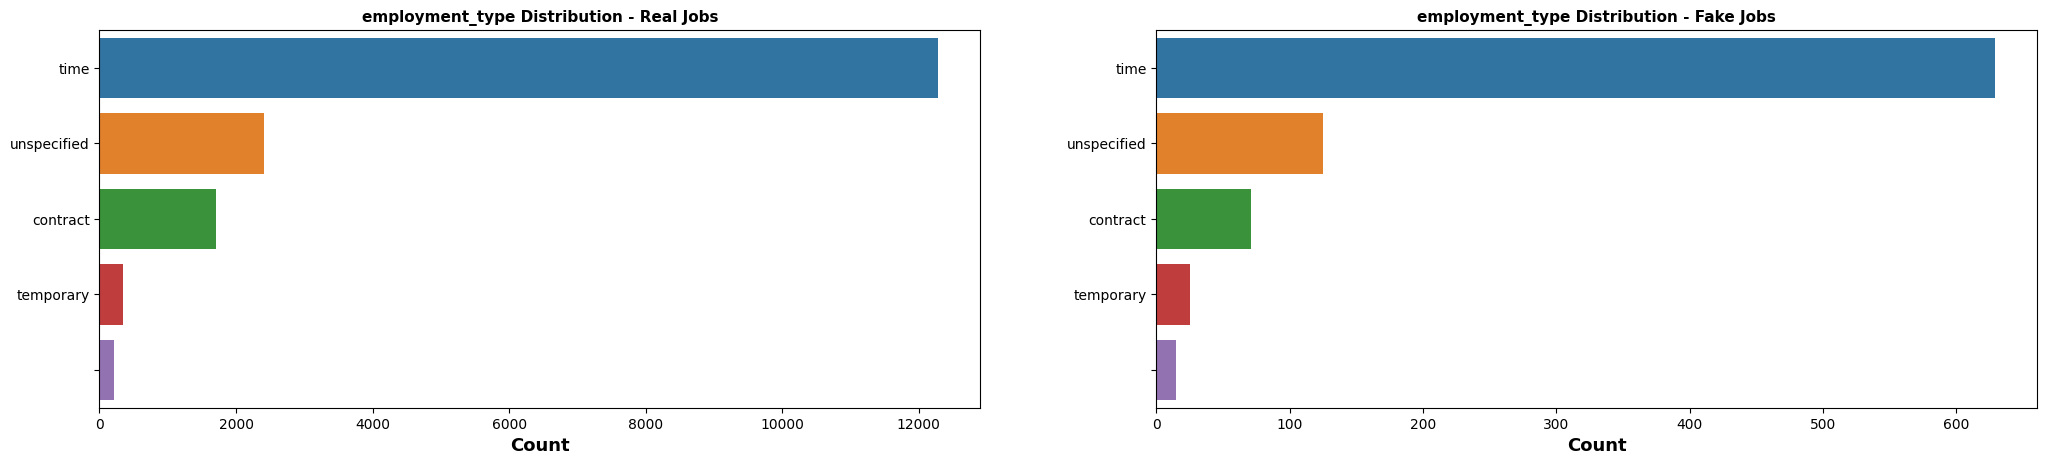

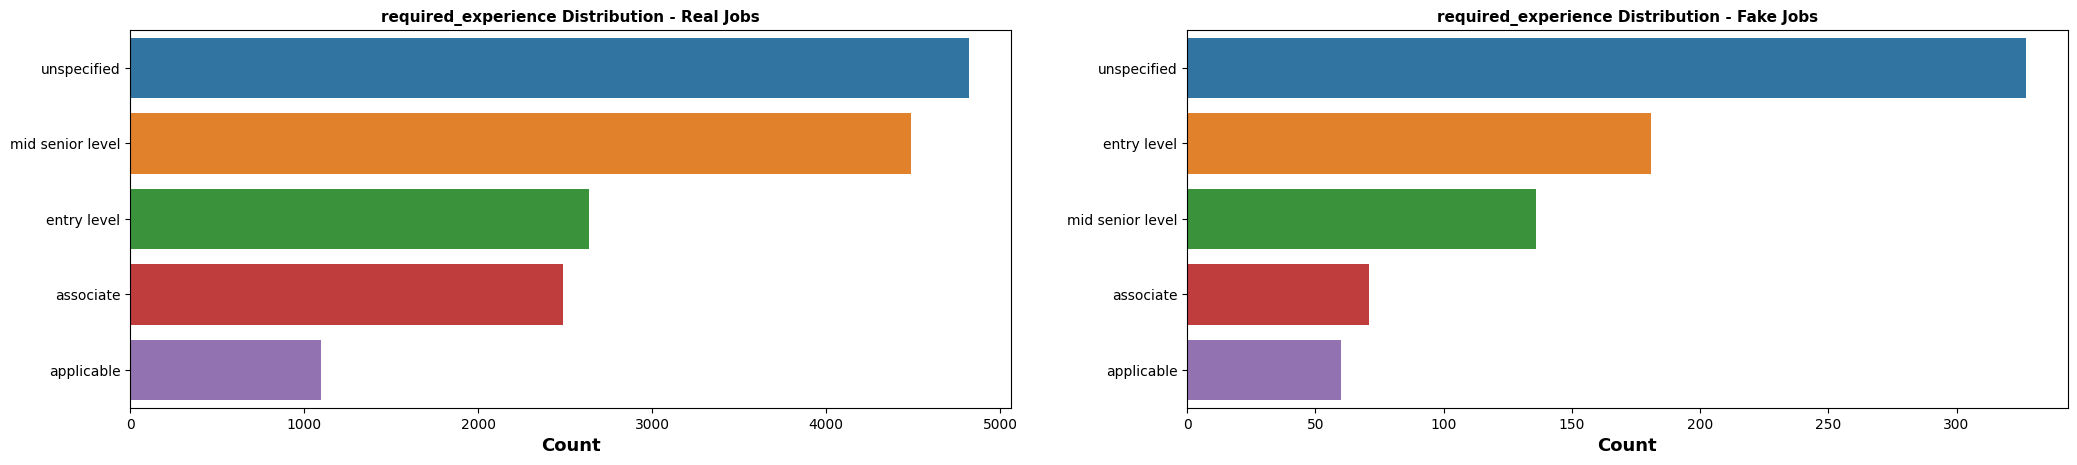

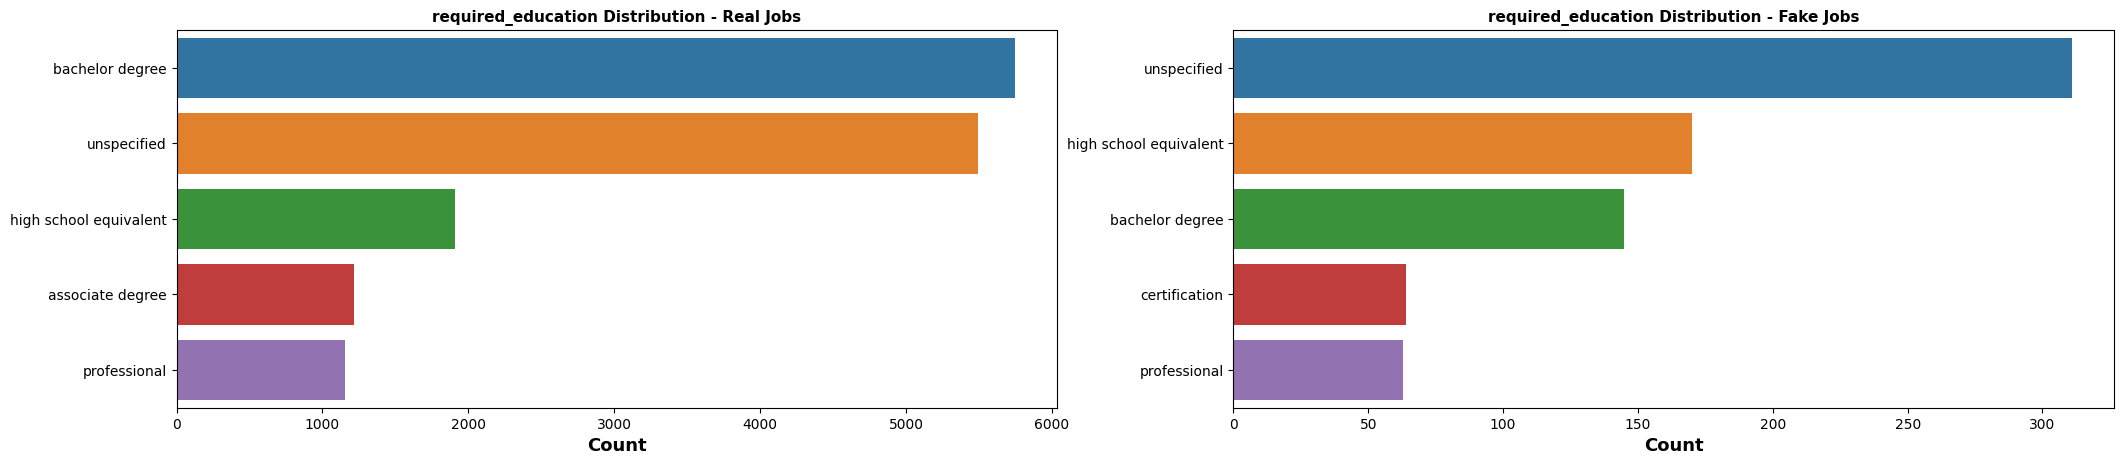

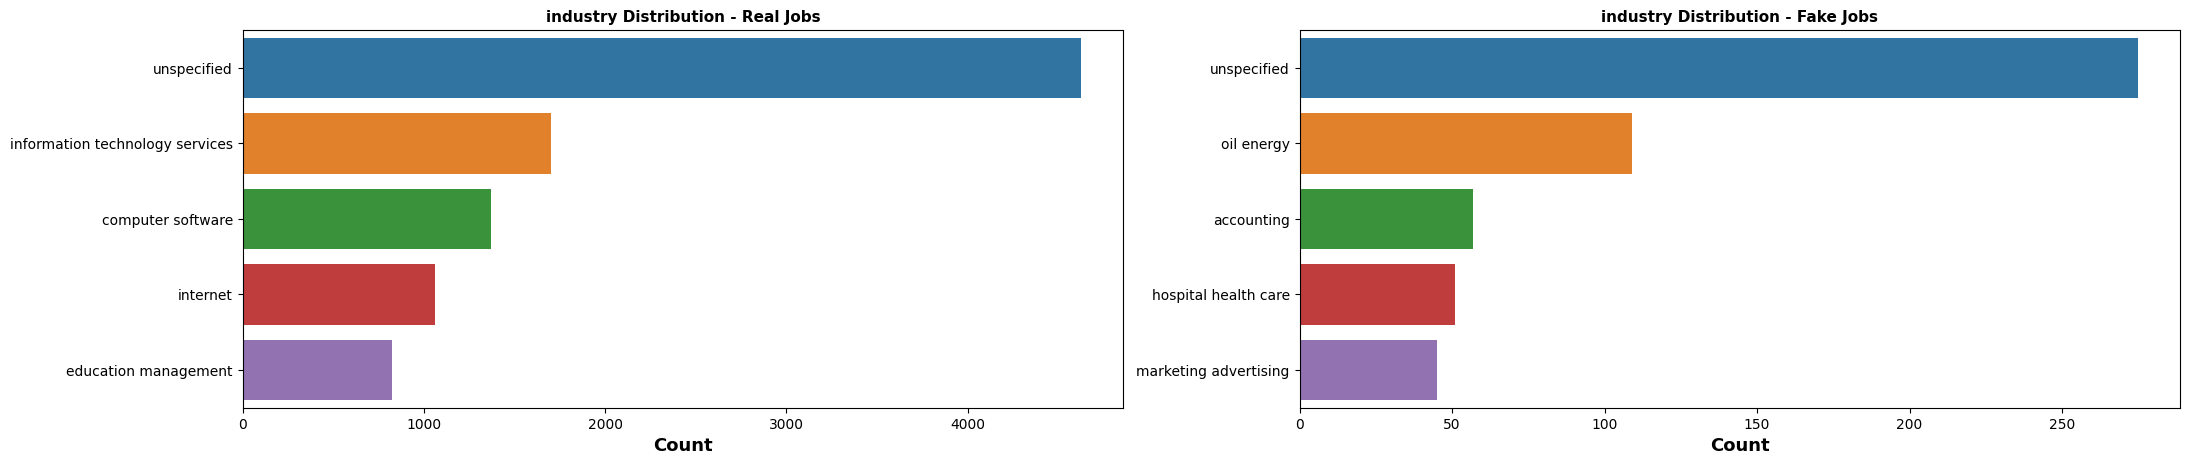

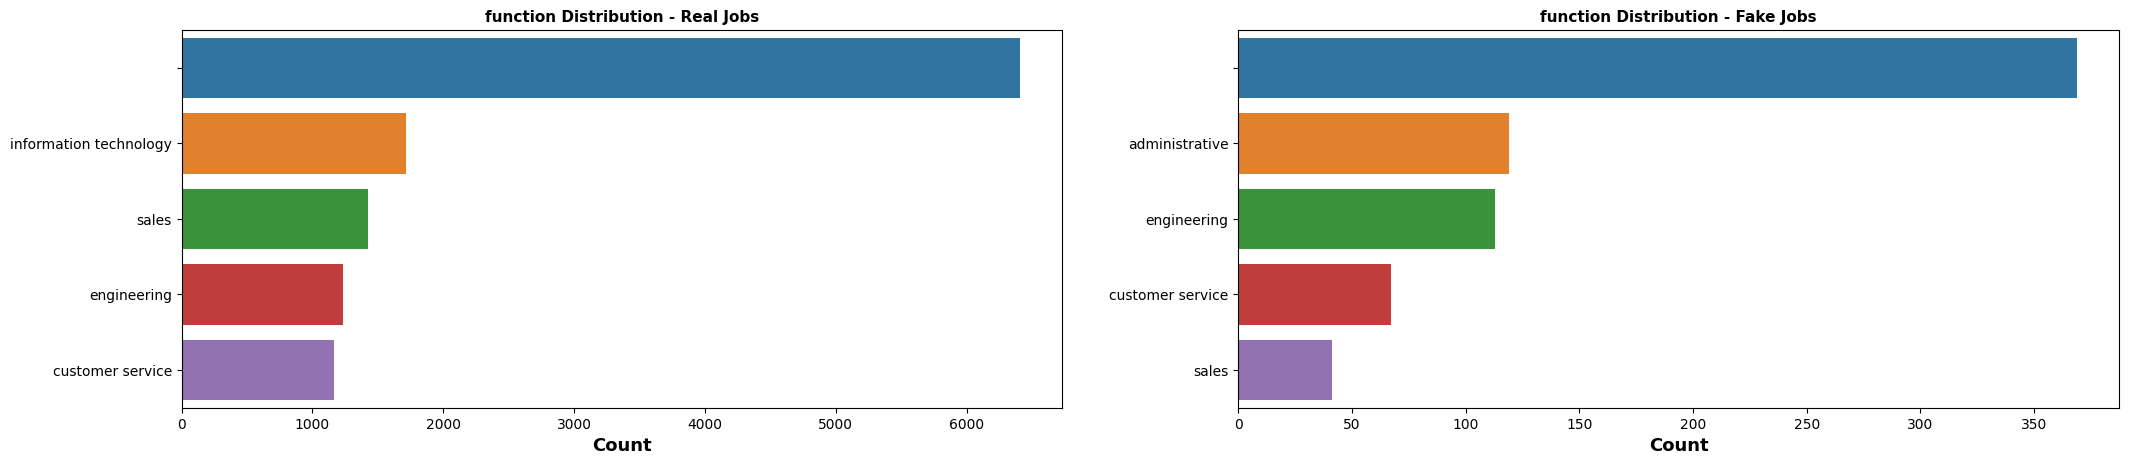

In [ ]:
# Top 5
dist_cols = ["employment_type", "required_experience", "required_education",  
             "industry", "function"]

for i in dist_cols:
  distribution_vis(i)

In [ ]:

def location(col):

  fig, axarr = plt.subplots(1, 2,figsize = (17,5))
  ax1 = axarr[0]
  ax2 = axarr[1]

  country1=Fraud_Job_df[Fraud_Job_df["fraudulent"] == True][col].value_counts()[:5]
  country2=Fraud_Job_df[Fraud_Job_df["fraudulent"] == False][col].value_counts()[:5]

  labels1 = country1.index
  labels2 = country2.index


  ax1.pie(country1, shadow=True, startangle=180, labels= labels1,  autopct='%1.1f%%',pctdistance=0.7)
  ax1.axis('equal')
  ax1.set_title('Fake Job Post', y=-0.1 ,fontdict = {'fontsize' : 13, 'fontweight' : 'bold'})
  #ax1.legend(labels1, loc = "upper right") 
  ax1.axis('equal')

  ax2.pie(country2, shadow=True, startangle=180, labels= labels2,   autopct='%1.1f%%',pctdistance=0.7)
  ax2.axis('equal') 
  ax2.set_title('Real Job Post', y=-0.1 , fontdict = {'fontsize' : 13, 'fontweight' : 'bold'})
  #ax2.legend(labels2, loc = "upper right") 
  ax2.axis('equal')


  fig.suptitle(col, fontweight='bold', fontsize= 19)



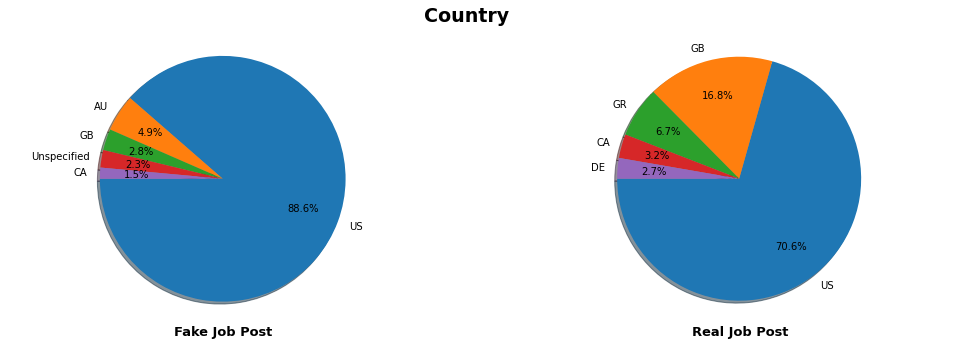

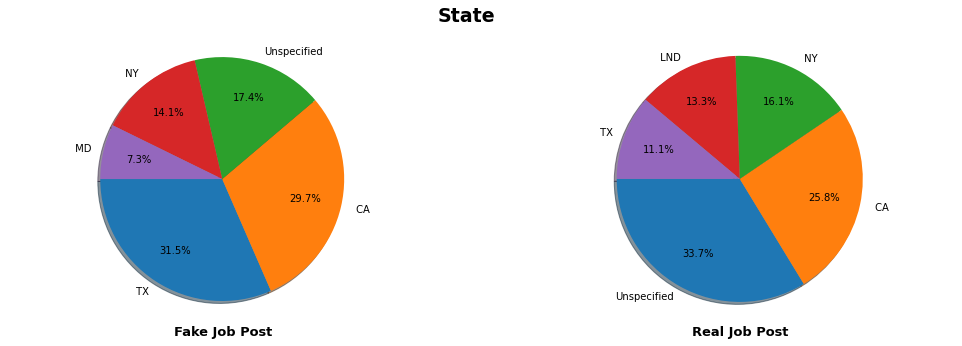

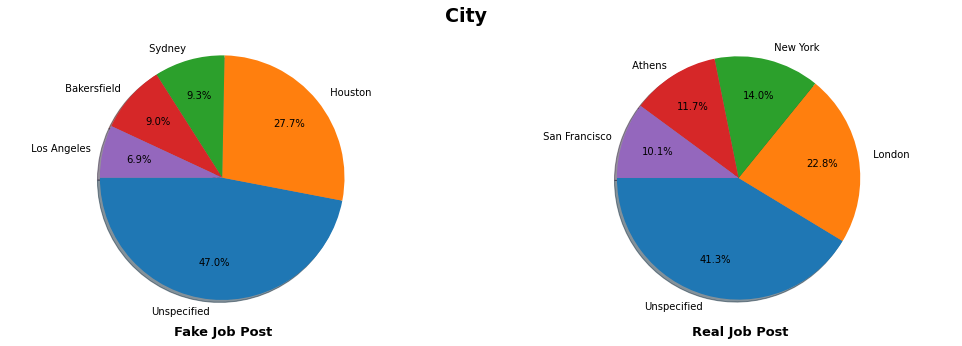

In [ ]:
loc = ['Country','State','City']


for i in loc:

 location(i)

### <b> <u> Characters Visualization </u> </b>

In [ ]:
def char_vis(Col):
  fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(15, 3), dpi=100)
  length=Fraud_Job_df[Fraud_Job_df["fraudulent"]==True][Col].str.len()
  ax1.hist(length,bins = 10,color='darkorange')
  ax1.set_title('Fake Job Post' ,fontsize=13, fontweight='bold')
  ax1.set_xlabel('No. of Characters', fontsize=11, fontweight='bold')
  ax1.set_ylabel('No. of Jobs', fontsize=11, fontweight='bold')


  length=Fraud_Job_df[Fraud_Job_df["fraudulent"]==False][Col].str.len()
  ax2.hist(length, bins = 10)
  ax2.set_title('Real Job Post' ,fontsize=13 , fontweight='bold')
  ax2.set_xlabel('No. of Characters', fontsize=11, fontweight='bold')
  ax2.set_ylabel('No. of Jobs', fontsize=11, fontweight='bold')

  fig.suptitle(f'Characters in {Col}', fontsize=15, fontweight='bold')
  plt.show()

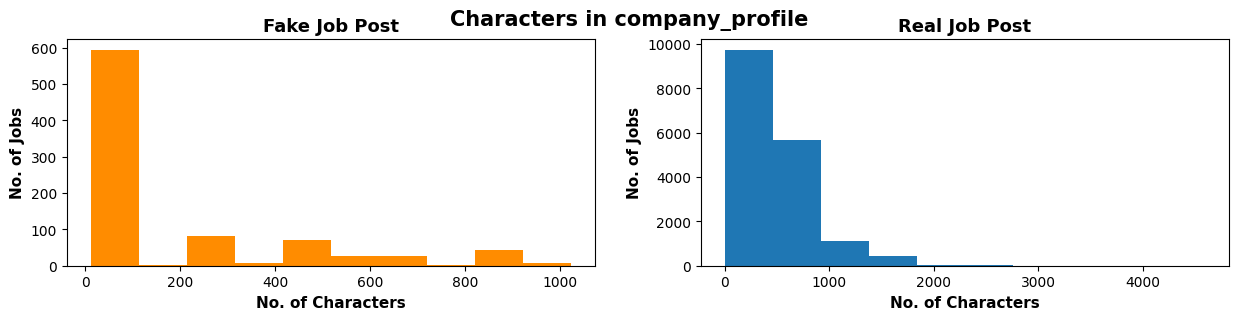

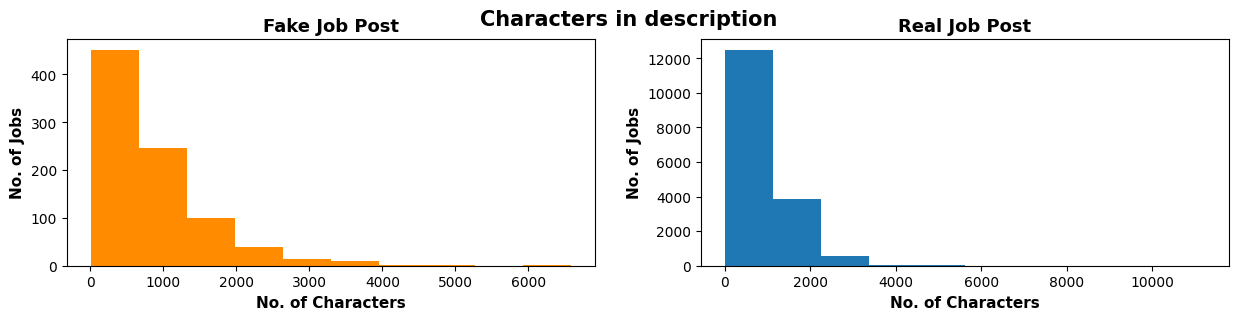

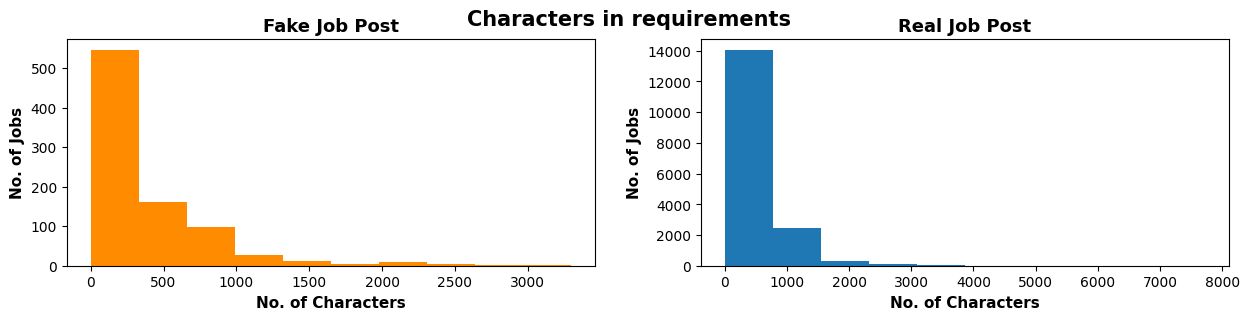

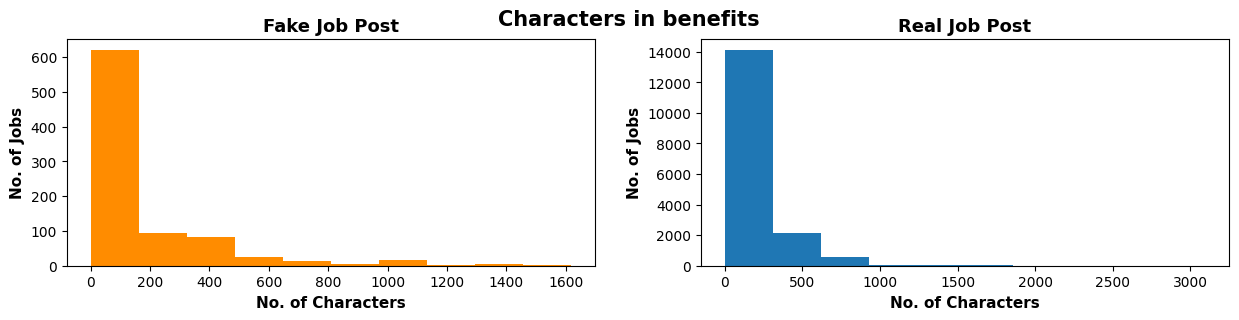

In [ ]:
col_char_vis = ['company_profile','description','requirements','benefits']
for i in col_char_vis:
 char_vis(i)
 print()

From the above graph, we can infer that   

<b><i>
              
*   Fake Job Posts has less characters however the real Job posts has more characters for the company_profile column
*   The distribution of the characters in the description column is almost same for both the fake and the real job posts. But, for few fake job posts the count goes till 3000
             
</i></b>

### <b> <u> Words Visualization </u> </b>

In [ ]:
def word_vis(Col):
  fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(15, 3), dpi=100)
  length=Fraud_Job_df[Fraud_Job_df["fraudulent"]==True][Col].str.split().map(lambda x: len(x))
  ax1.hist(length,bins = 10,color='darkorange')
  ax1.set_title('Fake Job Post' ,fontsize=13, fontweight='bold')
  ax1.set_xlabel('No. of Words', fontsize=11, fontweight='bold')
  ax1.set_ylabel('No. of Jobs', fontsize=11, fontweight='bold')

  length=Fraud_Job_df[Fraud_Job_df["fraudulent"]==False][Col].str.split().map(lambda x: len(x))
  ax2.hist(length, bins = 10)
  ax2.set_title('Real Job Post' ,fontsize=13 , fontweight='bold')
  ax2.set_xlabel('No. of Words', fontsize=11, fontweight='bold')
  ax2.set_ylabel('No. of Jobs', fontsize=11, fontweight='bold')
  fig.suptitle(f'Words in {Col}', fontsize=15, fontweight='bold')
  
  plt.show()

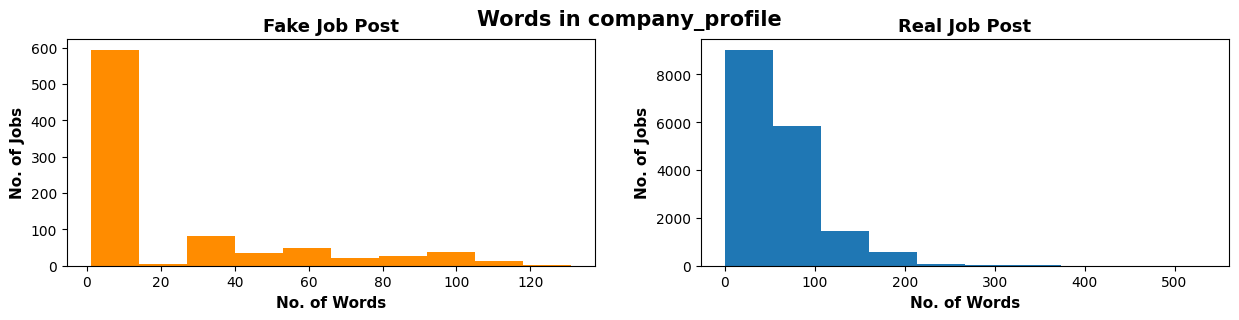

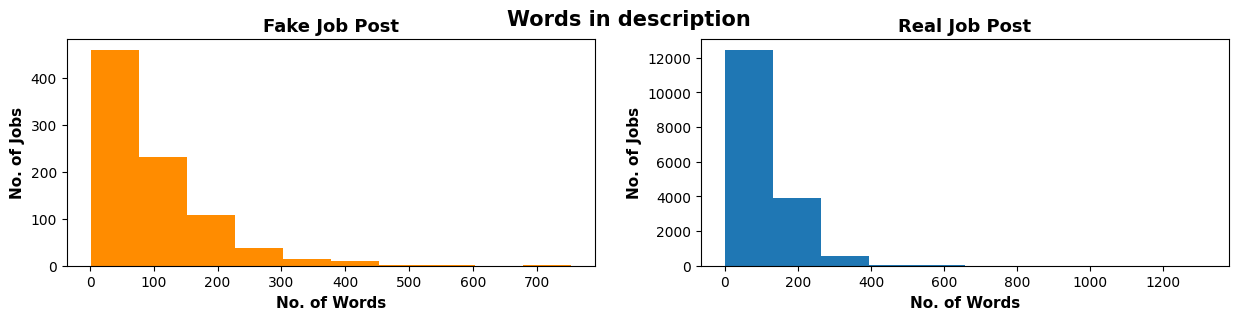

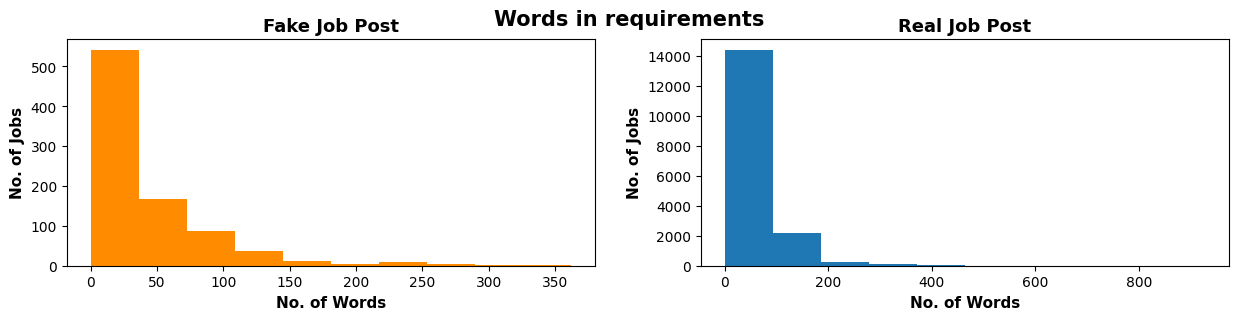

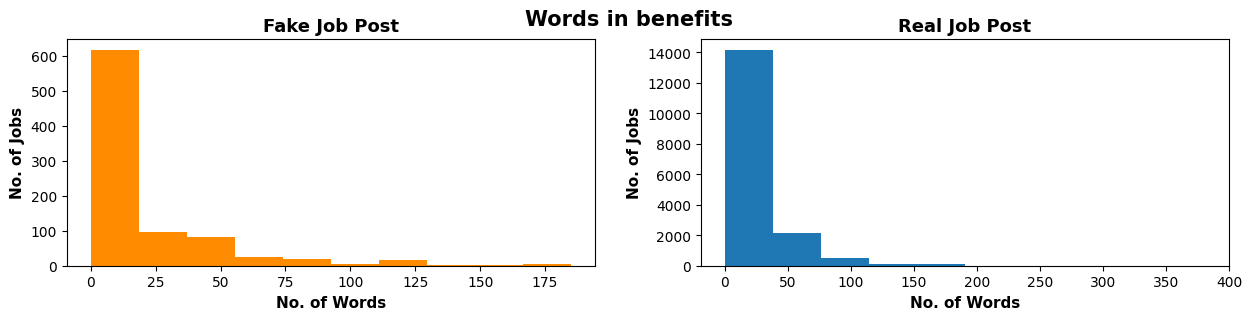

In [ ]:
col_word_vis = ['company_profile','description','requirements','benefits']
for i in col_word_vis:
 word_vis(i)
 print()

### <b> <u> Map Visualization - Total Job Posting Ads</u> </b>

In [ ]:
country_code_mapping = {"BD": "BGD", "BE": "BEL", "BF": "BFA", "BG": "BGR", "BA": "BIH", "BB": "BRB", "WF": "WLF", "BL": "BLM", "BM": "BMU", "BN": "BRN", "BO": "BOL", "BH": "BHR", "BI": "BDI", "BJ": "BEN", "BT": "BTN", "JM": "JAM", "BV": "BVT", "BW": "BWA", "WS": "WSM", "BQ": "BES", "BR": "BRA", "BS": "BHS", "JE": "JEY", "BY": "BLR", "BZ": "BLZ", "RU": "RUS", "RW": "RWA", "RS": "SRB", "TL": "TLS", "RE": "REU", "TM": "TKM", "TJ": "TJK", "RO": "ROU", "TK": "TKL", "GW": "GNB", "GU": "GUM", "GT": "GTM", "GS": "SGS", "GR": "GRC", "GQ": "GNQ", "GP": "GLP", "JP": "JPN", "GY": "GUY", "GG": "GGY", "GF": "GUF", "GE": "GEO", "GD": "GRD", "GB": "GBR", "GA": "GAB", "SV": "SLV", "GN": "GIN", "GM": "GMB", "GL": "GRL", "GI": "GIB", "GH": "GHA", "OM": "OMN", "TN": "TUN", "JO": "JOR", "HR": "HRV", "HT": "HTI", "HU": "HUN", "HK": "HKG", "HN": "HND", "HM": "HMD", "VE": "VEN", "PR": "PRI", "PS": "PSE", "PW": "PLW", "PT": "PRT", "SJ": "SJM", "PY": "PRY", "IQ": "IRQ", "PA": "PAN", "PF": "PYF", "PG": "PNG", "PE": "PER", "PK": "PAK", "PH": "PHL", "PN": "PCN", "PL": "POL", "PM": "SPM", "ZM": "ZMB", "EH": "ESH", "EE": "EST", "EG": "EGY", "ZA": "ZAF", "EC": "ECU", "IT": "ITA", "VN": "VNM", "SB": "SLB", "ET": "ETH", "SO": "SOM", "ZW": "ZWE", "SA": "SAU", "ES": "ESP", "ER": "ERI", "ME": "MNE", "MD": "MDA", "MG": "MDG", "MF": "MAF", "MA": "MAR", "MC": "MCO", "UZ": "UZB", "MM": "MMR", "ML": "MLI", "MO": "MAC", "MN": "MNG", "MH": "MHL", "MK": "MKD", "MU": "MUS", "MT": "MLT", "MW": "MWI", "MV": "MDV", "MQ": "MTQ", "MP": "MNP", "MS": "MSR", "MR": "MRT", "IM": "IMN", "UG": "UGA", "TZ": "TZA", "MY": "MYS", "MX": "MEX", "IL": "ISR", "FR": "FRA", "IO": "IOT", "SH": "SHN", "FI": "FIN", "FJ": "FJI", "FK": "FLK", "FM": "FSM", "FO": "FRO", "NI": "NIC", "NL": "NLD", "NO": "NOR", "NA": "NAM", "VU": "VUT", "NC": "NCL", "NE": "NER", "NF": "NFK", "NG": "NGA", "NZ": "NZL", "NP": "NPL", "NR": "NRU", "NU": "NIU", "CK": "COK", "XK": "XKX", "CI": "CIV", "CH": "CHE", "CO": "COL", "CN": "CHN", "CM": "CMR", "CL": "CHL", "CC": "CCK", "CA": "CAN", "CG": "COG", "CF": "CAF", "CD": "COD", "CZ": "CZE", "CY": "CYP", "CX": "CXR", "CR": "CRI", "CW": "CUW", "CV": "CPV", "CU": "CUB", "SZ": "SWZ", "SY": "SYR", "SX": "SXM", "KG": "KGZ", "KE": "KEN", "SS": "SSD", "SR": "SUR", "KI": "KIR", "KH": "KHM", "KN": "KNA", "KM": "COM", "ST": "STP", "SK": "SVK", "KR": "KOR", "SI": "SVN", "KP": "PRK", "KW": "KWT", "SN": "SEN", "SM": "SMR", "SL": "SLE", "SC": "SYC", "KZ": "KAZ", "KY": "CYM", "SG": "SGP", "SE": "SWE", "SD": "SDN", "DO": "DOM", "DM": "DMA", "DJ": "DJI", "DK": "DNK", "VG": "VGB", "DE": "DEU", "YE": "YEM", "DZ": "DZA", "US": "USA", "UY": "URY", "YT": "MYT", "UM": "UMI", "LB": "LBN", "LC": "LCA", "LA": "LAO", "TV": "TUV", "TW": "TWN", "TT": "TTO", "TR": "TUR", "LK": "LKA", "LI": "LIE", "LV": "LVA", "TO": "TON", "LT": "LTU", "LU": "LUX", "LR": "LBR", "LS": "LSO", "TH": "THA", "TF": "ATF", "TG": "TGO", "TD": "TCD", "TC": "TCA", "LY": "LBY", "VA": "VAT", "VC": "VCT", "AE": "ARE", "AD": "AND", "AG": "ATG", "AF": "AFG", "AI": "AIA", "VI": "VIR", "IS": "ISL", "IR": "IRN", "AM": "ARM", "AL": "ALB", "AO": "AGO", "AQ": "ATA", "AS": "ASM", "AR": "ARG", "AU": "AUS", "AT": "AUT", "AW": "ABW", "IN": "IND", "AX": "ALA", "AZ": "AZE", "IE": "IRL", "ID": "IDN", "UA": "UKR", "QA": "QAT", "MZ": "MOZ"}

In [ ]:
Fraud_Job_df['Country']=Fraud_Job_df['Country'].apply(lambda x:country_code_mapping[x] if x!='Unspecified' else 'Unspecified')


In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Choropleth(
    locations = Fraud_Job_df['Country'].value_counts().index,
    z = Fraud_Job_df['Country'].value_counts().values,
    text = Fraud_Job_df['Country'].value_counts().index,
    colorscale = 'Blues',
    autocolorscale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Job Ads',
))

fig.update_layout(
    title_text='Total Job Post Ads',
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    ),

)

fig.show()


### <b> <u> Map Visualization - Fake Job Posting Ads</u> </b>

In [ ]:
from collections import OrderedDict

fraud_list=Fraud_Job_df[Fraud_Job_df['fraudulent']==True]['Country'].value_counts()[:10].to_dict()
total_count_list=Fraud_Job_df['Country'].value_counts()[:10].to_dict()
# total_count_list = Fraud_Job_df[Fraud_Job_df['fraudulent']==True].size
percent_fraud_dict={}
for country in total_count_list.keys():
    if country in fraud_list:
        percent_fraud_dict[country]=fraud_list[country]/Fraud_Job_df[Fraud_Job_df["fraudulent"] == True]["fraudulent"].size*100
    else:
        percent_fraud_dict[country]=0
percent_fraud_dict=OrderedDict(sorted(percent_fraud_dict.items())) 

In [ ]:

fig = go.Figure(data=go.Choropleth(
    locations = list(percent_fraud_dict.keys()),
    z = list(percent_fraud_dict.values()),
    text =  list(percent_fraud_dict.keys()),
    autocolorscale=False,
    colorscale = 'tealrose',
    marker_line_color='darkgray',
    marker_line_width=1,
    colorbar_title = 'Job Ads percent'
))

fig.update_layout(
    title_text='Percentage of fraudulent job ads',
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    ),

)

fig.show()

In [ ]:
filt = Fraud_Job_df["fraudulent"] == True

Fraud_Job_df[Fraud_Job_df["fraudulent"] == False]["fraudulent"].size




17014

In [ ]:
Fraud_Job_df.size

357600

In [ ]:
Fraud_Job_df[Fraud_Job_df["fraudulent"] == False]["Country"].value_counts()

USA            9926
GBR            2361
GRC             940
CAN             445
DEU             383
NZL             333
Unspecified     327
IND             272
AUS             174
PHL             131
NLD             127
BEL             117
IRL             114
SGP              80
HKG              77
POL              73
ISR              72
EST              71
FRA              70
ESP              65
ARE              53
EGY              51
SWE              49
ROU              46
DNK              42
ZAF              39
BRA              35
ITA              31
FIN              29
PAK              26
LTU              23
JPN              20
RUS              20
MEX              18
PRT              18
BGR              17
TUR              17
QAT              15
CHN              15
CHE              15
MUS              14
HUN              14
SAU              14
AUT              14
UKR              13
MLT              13
IDN              12
CYP              11
KOR              10
THA              10


(array([17014.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   866.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

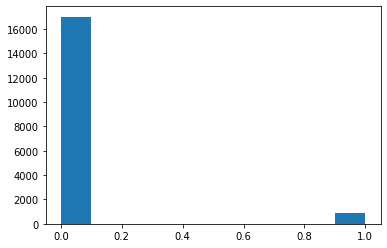

In [ ]:
plt.hist(x=Fraud_Job_df["fraudulent"].astype(int))

In [ ]:
Fraud_Job_df

,title,location,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,Country,State,City,Concat_Strings,req_desc
job_id,,,,,,,,,,,,,,,,,,,,
1,marketing intern,new york,food created groundbreaking award winning cook...,food fast growing james beard award winning on...,experience content management systems major pl...,unspecified,False,True,False,,internship,unspecified,unspecified,marketing,False,USA,NY,New York,marketing intern food fast growing james beard...,food fast growing james beard award winning on...
2,customer service cloud video production,auckland,seconds worlds cloud video production service ...,organised focused vibrant awesome passion cust...,expect key responsibility communicate client s...,usthrough seconds team gain experience working...,False,True,False,time,applicable,professional,marketing advertising,customer service,False,NZL,Unspecified,Auckland,customer service cloud video production organi...,organised focused vibrant awesome passion cust...
3,commissioning machinery assistant cma,wever,valor services provides workforce solutions me...,client located houston actively seeking experi...,implement pre commissioning commissioning proc...,unspecified,False,True,False,contract,mid senior level,certification,unspecified,,False,USA,IA,Wever,commissioning machinery assistant cma client l...,client located houston actively seeking experi...
4,account executive washington,washington,passion improving quality life geography heart...,company esri environmental systems research in...,education bachelor master gis business adminis...,culture corporate collaborative creative envir...,False,True,False,time,mid senior level,bachelor degree,computer software,sales,False,USA,DC,Washington,account executive washington company esri envi...,company esri environmental systems research in...
5,bill review manager,fort worth,spotsource solutions llc global human capital ...,job title itemization review managerlocation f...,qualifications license state texasdiploma bach...,benefits offered,False,True,True,time,mid senior level,bachelor degree,hospital health care,health care provider,False,USA,FL,Fort Worth,bill review manager job title itemization revi...,job title itemization review managerlocation f...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17876,account director distribution,toronto,vend looking awesome new talent come join work...,case time visited website vend award winning w...,ace role eat comprehensive statements work bre...,expect open culture openly share results input...,False,True,True,time,mid senior level,master degree,computer software,sales,False,CAN,ON,Toronto,account director distribution case time visite...,case time visited website vend award winning w...
17877,payroll accountant,philadelphia,weblinc commerce platform services provider fa...,payroll accountant focus primarily payroll fun...,accounting desire fun love genuine passion acc...,health wellnessmedical planprescription drug p...,False,True,True,time,mid senior level,bachelor degree,internet,accounting auditing,False,USA,PA,Philadelphia,payroll accountant payroll accountant focus pr...,payroll accountant focus primarily payroll fun...
17878,project cost control staff engineer cost contr...,houston,provide time permanent positions medium large ...,experienced project cost control staff enginee...,years professional experience ability work div...,unspecified,False,False,False,time,mid senior level,associate degree,unspecified,,False,USA,TX,Houston,project cost control staff engineer cost contr...,experienced project cost control staff enginee...


In [ ]:
Fraud_Job_df.describe()

,title,location,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,Country,State,City,Concat_Strings,req_desc
count,17880,17880,17880,17880,17880,17880,17880,17880,17880,17880,17880,17880,17880,17880,17880,17880,17880,17880,17880,17880
unique,9934,2175,1707,14390,11676,5642,2,2,2,6,8,14,132,37,2,91,325,2334,15364,14908
top,english teacher abroad,,unspecified,play kids paid love travel jobs asia usd month...,unspecified,unspecified,False,True,False,time,unspecified,bachelor degree,unspecified,,False,USA,Unspecified,Unspecified,english teacher abroad play kids paid love tra...,play kids paid love travel jobs asia usd month...
freq,406,1548,3308,417,2697,7218,17113,14220,9088,12914,5147,5895,4903,6780,17014,10656,2580,2068,401,405


## <u> <b>Machine Learning(ML)Modeling </b> </u>


For Binary classification, Information-based models like decision trees, Error based models like logistic regression, Similarity-based models like K-nearest neighbor(KNN), Probability-based models like Naive Bayes Tree, are available for solving such ML problems

We will be using below models for comparison and evaluation

<li> Linear Support Vector Classification </li>
<li>Gradient Boosting </li>
<li>Gaussian Naive Bayes</li>
<li>Logistic Regression</li>
<li>KNeighbors</li>
<li>Random Forest</li>
<li>XGBoost</li>


To overcome the shortcomings of having a highly unbalanced dataset, we have performed sampling on the dataset. Below are the three types of sampling that were done.

#### <u> <b> Transforming the features to numeric</b> </u>


In [ ]:
# Transforming the features


from sklearn.preprocessing import LabelEncoder

col_x = ['title', 'location', 'company_profile', 'description', 'requirements',
       'benefits', 'telecommuting', 'has_company_logo', 'has_questions',
       'employment_type', 'required_experience', 'required_education',
       'industry', 'function', 'Country', 'State', 'City' ]

label=LabelEncoder()

for col in col_x:

  Fraud_Job_df[col]=label.fit_transform(Fraud_Job_df[col])



#### <u> <b> Splitting the dataset into training, validation and test</b> </u>


In [ ]:
# Reading the features and Target values into X and Y respectively

X = Fraud_Job_df[col_x]
y = Fraud_Job_df[['fraudulent']]




In [ ]:
# Splitting the data in the ratio of 75 : 25

from sklearn.model_selection import train_test_split


# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2, random_state=42
)

# Split training into validation and training
X_train, X_val, y_train, y_val = train_test_split(
    X_train ,y_train, test_size=0.25, random_state=42
)

print(f'''% Positive class in Train = {np.round(y_train.value_counts(normalize=True)[1] * 100, 2)}
\n% Positive class in Test  = {np.round(y_test.value_counts(normalize=True)[1] * 100, 2)}''')


print()
print(f"% Positive class in Validation = {np.round(y_val.value_counts(normalize=True)[1] * 100, 2)}")
# \n% Positive class in Test  = {np.round(y_test.value_counts(normalize=True)[1] * 100, 2)}''')

% Positive class in Train = fraudulent
True          4.66
dtype: float64

% Positive class in Test  = fraudulent
True          5.06
dtype: float64

% Positive class in Validation = fraudulent
True          5.17
dtype: float64


In [ ]:
print()
print(f"Shape of training dataset: {X_train.shape}")
print(f"Shape of validation dataset: {X_val.shape}")
print(f"Shape of test dataset: {X_test.shape}")
print()
print()
print(f"Shape of training dataset: {y_train.shape}")
print(f"Shape of validation dataset: {y_val.shape}")
print(f"Shape of test dataset: {y_test.shape}")
print()


Shape of training dataset: (10728, 17)
Shape of validation dataset: (3576, 17)
Shape of test dataset: (3576, 17)


Shape of training dataset: (10728, 1)
Shape of validation dataset: (3576, 1)
Shape of test dataset: (3576, 1)



#### <u> <b>Baseline model prediction summary and graph</b> </u>

To find a baseline predicton model, all the chosen models were run on the dataset


In [ ]:
# Displaying Model Prediction Summary & Graph 

Names = ['LinearSVC' , 'GradientBoostingClassifier', 'GaussianNB', 'LogisticRegression' , 'KNeighborsClassifier',
          'RandomForestClassifier','XGBClassifier']
pred = {'Model Names': Names}
Model_Pred = pd.DataFrame (pred)
Model_Pred['Train Accuracy'] = ''
Model_Pred['Test Accuracy']  = ''
Model_Pred['Precision']      = ''
Model_Pred['Recall']         = ''
Model_Pred['F1 Score']       = ''


def summary_graph():

  print()
  print('\033[1m')
  print("-" * 110)
  print("                                                Model Prediction Summary")
  print("-" * 110)
  print('\033[0m')


  from tabulate import tabulate
  print(tabulate(Model_Pred, headers='keys', tablefmt='psql'))
  print()


  Model_Pred.plot(x ='Model Names', y = ['Train Accuracy' , 'Test Accuracy'] 
                  ,figsize=(15, 5), marker = 'o')
  plt.title('Comparison of Different Machine Learning models', fontweight='bold'
  , fontsize = 15)
  plt.xlabel('Machine Learning Models', fontweight='bold',labelpad=10
             , fontsize = 13)
  plt.ylabel('Accuracy', fontweight='bold' ,labelpad=10 , fontsize = 13)
  plt.show()

#### <u> <b>Before oversampling</b> </u>

The Random Forest(RF) and XGBoost model outperforms other models


BEFORE:  SMOTE Oversampling - All features 

---------------------------------------------


Prediction for LinearSVC 

Train Dataset Accuracy : 0.9534 
 Test Dataset Accuracy : 0.9494 
 ROC AUC Score         : 0.5 



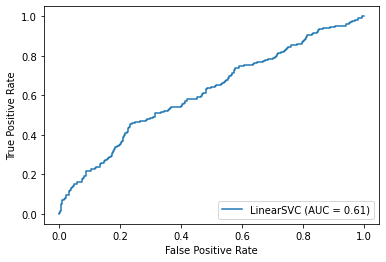


Confusion Matrix  

[[3395  181]
 [   0    0]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.95      1.00      0.97      3395
        True       0.00      0.00      0.00       181

    accuracy                           0.95      3576
   macro avg       0.47      0.50      0.49      3576
weighted avg       0.90      0.95      0.92      3576



Prediction for GradientBoostingClassifier 

Train Dataset Accuracy : 0.9771 
 Test Dataset Accuracy : 0.9704 
 ROC AUC Score         : 0.7333 



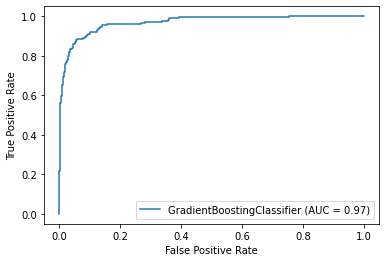


Confusion Matrix  

[[3385   96]
 [  10   85]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.97      1.00      0.98      3395
        True       0.89      0.47      0.62       181

    accuracy                           0.97      3576
   macro avg       0.93      0.73      0.80      3576
weighted avg       0.97      0.97      0.97      3576



Prediction for GaussianNB 

Train Dataset Accuracy : 0.94 
 Test Dataset Accuracy : 0.9354 
 ROC AUC Score         : 0.6469 



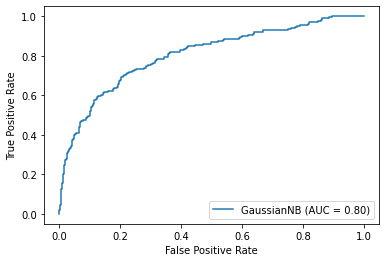


Confusion Matrix  

[[3286  122]
 [ 109   59]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.96      0.97      0.97      3395
        True       0.35      0.33      0.34       181

    accuracy                           0.94      3576
   macro avg       0.66      0.65      0.65      3576
weighted avg       0.93      0.94      0.93      3576



Prediction for LogisticRegression 

Train Dataset Accuracy : 0.9529 
 Test Dataset Accuracy : 0.9494 
 ROC AUC Score         : 0.5026 



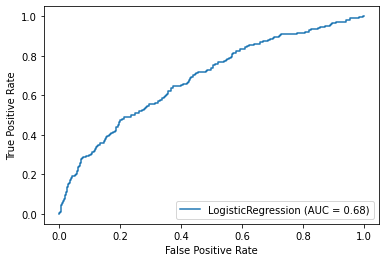


Confusion Matrix  

[[3394  180]
 [   1    1]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.95      1.00      0.97      3395
        True       0.50      0.01      0.01       181

    accuracy                           0.95      3576
   macro avg       0.72      0.50      0.49      3576
weighted avg       0.93      0.95      0.93      3576



Prediction for KNeighborsClassifier 

Train Dataset Accuracy : 0.964 
 Test Dataset Accuracy : 0.9569 
 ROC AUC Score         : 0.6452 



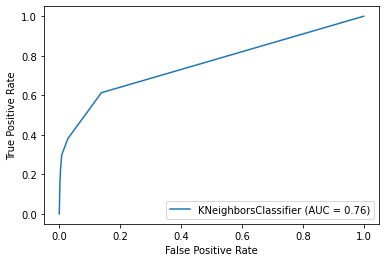


Confusion Matrix  

[[3368  127]
 [  27   54]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.96      0.99      0.98      3395
        True       0.67      0.30      0.41       181

    accuracy                           0.96      3576
   macro avg       0.82      0.65      0.69      3576
weighted avg       0.95      0.96      0.95      3576



Prediction for RandomForestClassifier 

Train Dataset Accuracy : 1.0 
 Test Dataset Accuracy : 0.9785 
 ROC AUC Score         : 0.8134 



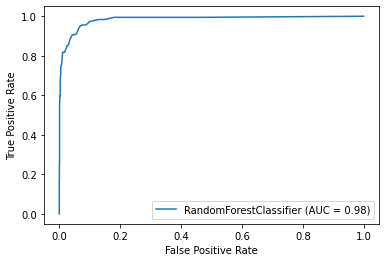


Confusion Matrix  

[[3385   67]
 [  10  114]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.98      1.00      0.99      3395
        True       0.92      0.63      0.75       181

    accuracy                           0.98      3576
   macro avg       0.95      0.81      0.87      3576
weighted avg       0.98      0.98      0.98      3576



Prediction for XGBClassifier 

Train Dataset Accuracy : 0.9725 
 Test Dataset Accuracy : 0.9676 
 ROC AUC Score         : 0.6979 



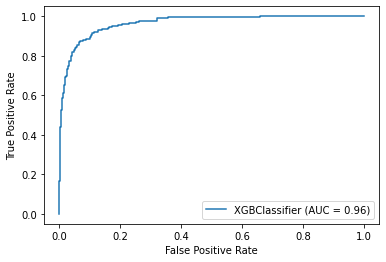


Confusion Matrix  

[[3388  109]
 [   7   72]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.97      1.00      0.98      3395
        True       0.91      0.40      0.55       181

    accuracy                           0.97      3576
   macro avg       0.94      0.70      0.77      3576
weighted avg       0.97      0.97      0.96      3576




--------------------------------------------------------------------------------------------------------------
                                                Model Prediction Summary
--------------------------------------------------------------------------------------------------------------

+----+----------------------------+------------------+-----------------+-------------+----------+------------+
|    | Model Names                |   Train Accuracy |   Test Accuracy |   Precision |   Recall |   F1 Score |
|----+----------------------------+------------------+-----------------+--

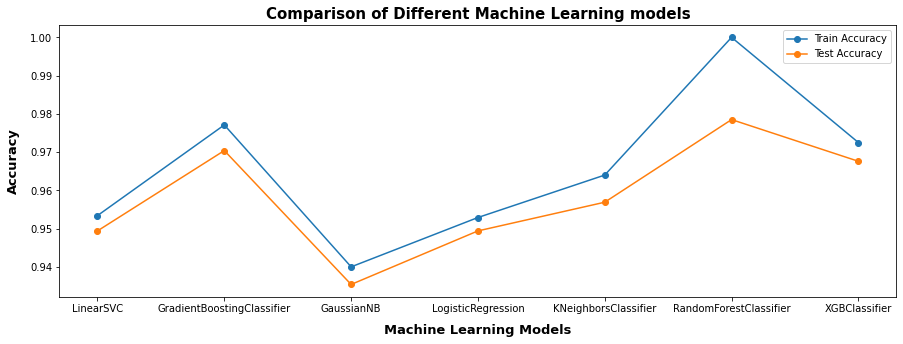

In [ ]:
# Model Prediction

from sklearn import datasets, metrics, model_selection, svm

import warnings
warnings.filterwarnings("ignore")

def model_prediction(model, X_train, y_train, X_test, y_test,model_name):
    
    y_array = np.array(y_train).reshape(len(y_train),)
    
    model_fitted = model.fit(X_train, y_array)
    print('\033[1m')
    print(f"Prediction for {model_name} ")
    print('\033[0m')

    train_fit = model_fitted.predict(X_train)
    test_fit  = model_fitted.predict(X_test)

    train_accuracy = round(accuracy_score(train_fit,y_train),4)
    test_accuracy  = round(accuracy_score(test_fit,y_test),4)
    precision      = round(precision_score(test_fit,y_test),4)
    recall         = round(recall_score(test_fit,y_test),4)
    f1             = round(f1_score(test_fit,y_test),4)
    
    roc_auc        = round(roc_auc_score(y_test,test_fit),4)

    print(f"Train Dataset Accuracy : {train_accuracy} ")
    print(f" Test Dataset Accuracy : {test_accuracy} ")
    print(f" ROC AUC Score         : {roc_auc} \n")

    metrics.plot_roc_curve(model, X_test, y_test) 
    plt.show()  

    print(f"\nConfusion Matrix  \n\n{confusion_matrix(test_fit,y_test)}\n\n")

    print(f"\n Classification Report : \n")
    print(classification_report(y_test,test_fit))
    
    
    print()

    return(train_accuracy,test_accuracy,precision,recall,f1)

pred_models_list = [("LinearSVC", LinearSVC()), 
                    ("GradientBoostingClassifier",GradientBoostingClassifier()), 
                    ("GaussianNB", GaussianNB()),("LogisticRegression", LogisticRegression()) 
                    ,("KNeighborsClassifier",KNeighborsClassifier())
                    ,("RandomForestClassifier",RandomForestClassifier())                    
                    ,("XGBClassifier",XGBClassifier())]



print('\033[1m')
print("BEFORE:  SMOTE Oversampling - All features ")
print('\033[0m')
print("-" * 45)
print()
i = 0

for model in pred_models_list:
    
    train,test,prec,rec,f1_sc = model_prediction(model[1],X_train
                                              , y_train,X_test,y_test,model[0])
    Model_Pred['Train Accuracy'][i]= train
    Model_Pred['Test Accuracy'][i] = test
    Model_Pred['Precision'] [i]    = prec
    Model_Pred['Recall'][i]        = rec
    Model_Pred['F1 Score'][i]      = f1_sc
    i = i+1


summary_graph()   

#### <u> <b>k-fold validation</b> </u>

Validate that the Random Forest(RF) and XGBoost model outperforms other models

In [ ]:
kNames = ['RandomForestClassifier','XGBClassifier']
kpred = {'Model Names': kNames}
kModel_Pred = pd.DataFrame (kpred)
kModel_Pred['Accuracy']       = ''
kModel_Pred['Precision']      = ''
kModel_Pred['Recall']         = ''
kModel_Pred['F1 Score']       = ''


def ksummary_graph():

  print()
  print('\033[1m')
  print("-" * 81)
  print("                       K-fold Cross : Prediction Summary")
  print("-" * 81)
  print('\033[0m')


  from tabulate import tabulate
  print(tabulate(kModel_Pred, headers='keys', tablefmt='psql'))
  print()


In [ ]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=10)

def validation_test(model_test):
 acc=[]
 Recall=[]
 Precision=[]
 F1_score=[]  
  
 for train_index,test_index in kf.split(X):
    X_train,X_test,y_train,y_test=X.iloc[train_index],X.iloc[test_index],y.iloc[train_index],y.iloc[test_index]
    model_test.fit(X_train,y_train)
    pred_rf=model_test.predict(X_test)

    accur_rf=round(accuracy_score(y_test,pred_rf),4)  
    acc.append(accur_rf)

    re=round(recall_score(y_test,pred_rf),4) 
    Recall.append(re)

    pre=round(precision_score(y_test,pred_rf),4) 
    Precision.append(pre)

    f1=round(f1_score(y_test,pred_rf),4)
    F1_score.append(f1)

 re  = np.mean(Recall)
 pre = np.mean(Precision)
 accur_rf = np.mean(acc)
 f1 = np.mean(F1_score)
  
       


 print(f"    Recall Score : {np.mean(re):.4f}")
 print(f" Precision Score : {np.mean(pre):.4f}")
 print(f"  Accuracy Score : {np.mean(accur_rf):.4f}")
 print(f"        F1 Score : {np.mean(f1):.4f}\n")

 return(accur_rf,re,pre,f1)

print('\033[1m')
print(f"Random Forest Classifier \n")
print('\033[0m')
RFE=RandomForestClassifier(n_estimators=100,random_state=1) 
accur_rf,re,pre,f1 = validation_test(RFE)
kModel_Pred['Accuracy'][0]  = accur_rf
kModel_Pred['Precision'][0] = re
kModel_Pred['Recall'][0]    = pre
kModel_Pred['F1 Score'][0]  = f1


print('\033[1m')
print(f"XGBOOST Classifier \n")
print('\033[0m')
accur_rf,re,pre,f1 = validation_test(XGBClassifier())
kModel_Pred['Accuracy'][1]  = accur_rf
kModel_Pred['Precision'][1] = re
kModel_Pred['Recall'][1]    = pre
kModel_Pred['F1 Score'][1]  = f1

    

ksummary_graph() 


Random Forest Classifier 


    Recall Score : 0.5668
 Precision Score : 0.8893
  Accuracy Score : 0.9753
        F1 Score : 0.6829


XGBOOST Classifier 


    Recall Score : 0.3147
 Precision Score : 0.8390
  Accuracy Score : 0.9620
        F1 Score : 0.4328



---------------------------------------------------------------------------------
                       K-fold Cross : Prediction Summary
---------------------------------------------------------------------------------

+----+------------------------+------------+-------------+----------+------------+
|    | Model Names            |   Accuracy |   Precision |   Recall |   F1 Score |
|----+------------------------+------------+-------------+----------+------------|
|  0 | RandomForestClassifier |    0.97531 |     0.5668  |  0.88931 |    0.68292 |
|  1 | XGBClassifier          |    0.96195 |     0.31472 |  0.83903 |    0.43281 |
+----+------------------------+------------+-------------+----------+------------+





---

### <u> <b> Performing Sampling for correcting the imbalance in data</b> </u>


#### <u> **Oversampling with SMOTE** </u>

This sampling technique aims to increase the number of samples of the class that has a lesser number of samples. In our case, the “fraudulent” class had to be oversampled

In [ ]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

# X_sm, y_sm = sm.fit_resample(np.array(X_train).ravel(), np.array(y_train).ravel())
X_sm, y_sm = sm.fit_resample(X_train, y_train)


print(f'''Shape of X before SMOTE : {X.shape}
 Shape of X after SMOTE : {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
print(np.sum(y_sm==1)/len(y_sm) * 100)
print(np.sum(y_sm==0)/len(y_sm) * 100)

# Convert to dataframe for this version of SMOTE (Python 3.7)
X_sm_df = pd.DataFrame(data=X_sm,columns=np.array(X.columns))
y_sm = np.array(y_sm).reshape(len(y_sm),)


Shape of X before SMOTE : (17880, 17)
 Shape of X after SMOTE : (20456, 17)

Balance of positive and negative classes (%):
50.0
50.0


#### <u> **Random Undersampling** </u>

This sampling technique aims to reduce the number of samples of the class that has the majority of samples. Here, in our case, the “non-fraudulent” class has the highest samples and this will reduce the number of samples in the non-fraudulent class.

Shape of X before SMOTE : (17880, 17)
 Shape of X after SMOTE : (1500, 17)

Balance of positive and negative classes (%):
33.33333333333333
66.66666666666666

Prediction for LinearSVC 

Train Dataset Accuracy : 0.6853 
 Test Dataset Accuracy : 0.9463 
 ROC AUC Score         : 0.5245 



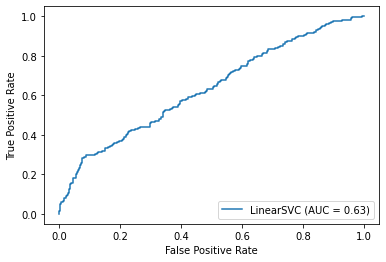


Confusion Matrix  

[[3374  171]
 [  21   10]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.95      0.99      0.97      3395
        True       0.32      0.06      0.09       181

    accuracy                           0.95      3576
   macro avg       0.64      0.52      0.53      3576
weighted avg       0.92      0.95      0.93      3576



Prediction for GradientBoostingClassifier 

Train Dataset Accuracy : 0.9467 
 Test Dataset Accuracy : 0.9133 
 ROC AUC Score         : 0.8994 



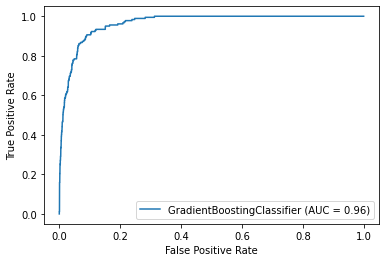


Confusion Matrix  

[[3106   21]
 [ 289  160]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.99      0.91      0.95      3395
        True       0.36      0.88      0.51       181

    accuracy                           0.91      3576
   macro avg       0.67      0.90      0.73      3576
weighted avg       0.96      0.91      0.93      3576



Prediction for GaussianNB 

Train Dataset Accuracy : 0.77 
 Test Dataset Accuracy : 0.8048 
 ROC AUC Score         : 0.7324 



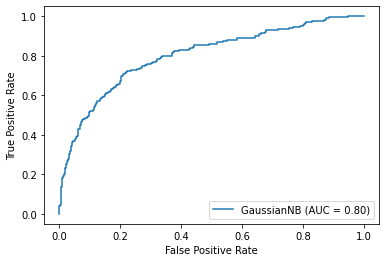


Confusion Matrix  

[[2760   63]
 [ 635  118]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.98      0.81      0.89      3395
        True       0.16      0.65      0.25       181

    accuracy                           0.80      3576
   macro avg       0.57      0.73      0.57      3576
weighted avg       0.94      0.80      0.86      3576



Prediction for LogisticRegression 

Train Dataset Accuracy : 0.7 
 Test Dataset Accuracy : 0.8518 
 ROC AUC Score         : 0.616 



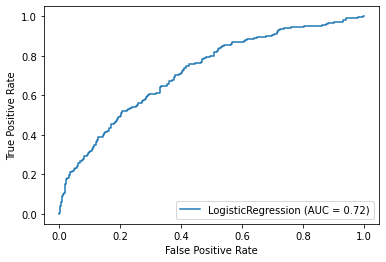


Confusion Matrix  

[[2982  117]
 [ 413   64]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.96      0.88      0.92      3395
        True       0.13      0.35      0.19       181

    accuracy                           0.85      3576
   macro avg       0.55      0.62      0.56      3576
weighted avg       0.92      0.85      0.88      3576



Prediction for KNeighborsClassifier 

Train Dataset Accuracy : 0.806 
 Test Dataset Accuracy : 0.816 
 ROC AUC Score         : 0.7096 



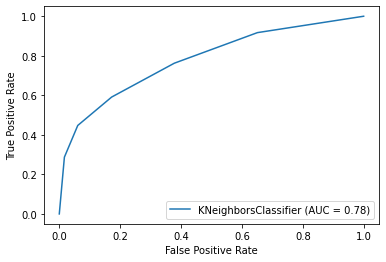


Confusion Matrix  

[[2811   74]
 [ 584  107]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.97      0.83      0.90      3395
        True       0.15      0.59      0.25       181

    accuracy                           0.82      3576
   macro avg       0.56      0.71      0.57      3576
weighted avg       0.93      0.82      0.86      3576



Prediction for RandomForestClassifier 

Train Dataset Accuracy : 1.0 
 Test Dataset Accuracy : 0.9259 
 ROC AUC Score         : 0.9008 



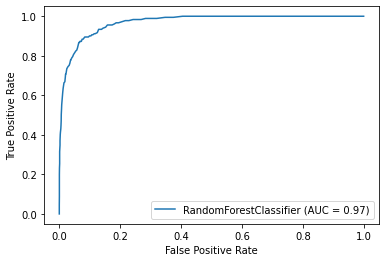


Confusion Matrix  

[[3153   23]
 [ 242  158]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.99      0.93      0.96      3395
        True       0.40      0.87      0.54       181

    accuracy                           0.93      3576
   macro avg       0.69      0.90      0.75      3576
weighted avg       0.96      0.93      0.94      3576



Prediction for XGBClassifier 

Train Dataset Accuracy : 0.936 
 Test Dataset Accuracy : 0.9088 
 ROC AUC Score         : 0.8945 



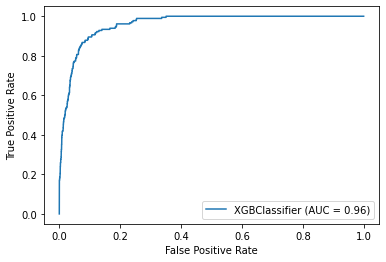


Confusion Matrix  

[[3091   22]
 [ 304  159]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.99      0.91      0.95      3395
        True       0.34      0.88      0.49       181

    accuracy                           0.91      3576
   macro avg       0.67      0.89      0.72      3576
weighted avg       0.96      0.91      0.93      3576




--------------------------------------------------------------------------------------------------------------
                                                Model Prediction Summary
--------------------------------------------------------------------------------------------------------------

+----+----------------------------+------------------+-----------------+-------------+----------+------------+
|    | Model Names                |   Train Accuracy |   Test Accuracy |   Precision |   Recall |   F1 Score |
|----+----------------------------+------------------+-----------------+--

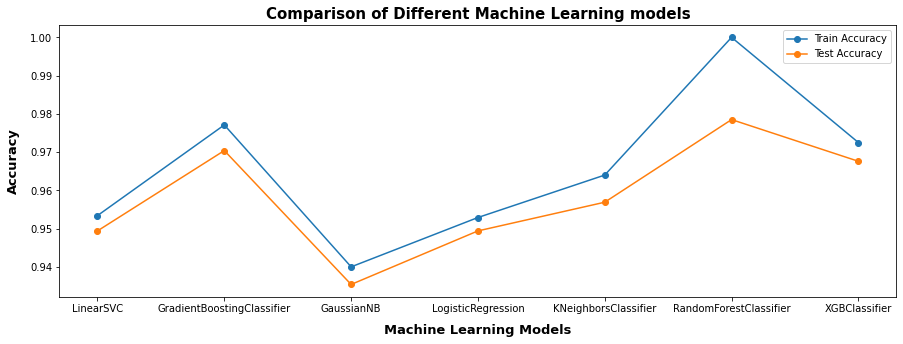

In [ ]:
# UnderSampling - SMOTE

from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy=0.5)
# fit and apply the transform
X_under, y_under = undersample.fit_resample(X_train, y_train)


# # X_sm, y_sm = sm.fit_resample(np.array(X_train).ravel(), np.array(y_train).ravel())
# X_sm, y_sm = undersample.fit_resample(X_train, y_train)


print(f'''Shape of X before SMOTE : {X.shape}
 Shape of X after SMOTE : {X_under.shape}''')

print('\nBalance of positive and negative classes (%):')
print(np.sum(y_under==1)/len(y_under) * 100)
print(np.sum(y_under==0)/len(y_under) * 100)

# Convert to dataframe for this version of SMOTE (Python 3.7)
X_under_df = pd.DataFrame(data=X_under,columns=np.array(X.columns))
y_under = np.array(y_under).reshape(len(y_under),)



for model in pred_models_list:
    train_under,test_under,prec_under,rec_under,f1_sc_under       = model_prediction(model[1],X_under_df, y_under,X_test,y_test,model[0])
    Model_Pred['Train Accuracy'][i] = train_under
    Model_Pred['Test Accuracy'][i]  = test_under
    Model_Pred['Precision'] [i]     = prec
    Model_Pred['Recall'][i]         = rec
    Model_Pred['F1 Score'][i]       = f1_sc
    i = i+1
    

summary_graph() 

#### <u> **Combine Random Undersampling and Oversampling with SMOTE** </u>

This technique combines both the techniques to improve the balance of the dataset with respect to the target classes

Shape of X before SMOTE : (17880, 17)
 Shape of X after SMOTE : (13473, 17)

Balance of positive and negative classes (%):
35.75298745639427
64.24701254360573

Prediction for LinearSVC 

Train Dataset Accuracy : 0.646 
 Test Dataset Accuracy : 0.943 
 ROC AUC Score         : 0.5097 



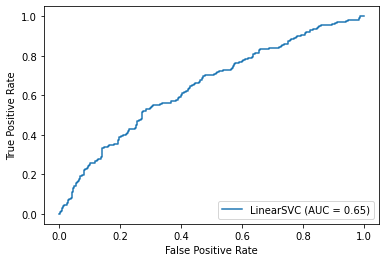


Confusion Matrix  

[[3367  176]
 [  28    5]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.95      0.99      0.97      3395
        True       0.15      0.03      0.05       181

    accuracy                           0.94      3576
   macro avg       0.55      0.51      0.51      3576
weighted avg       0.91      0.94      0.92      3576



Prediction for GradientBoostingClassifier 

Train Dataset Accuracy : 0.9522 
 Test Dataset Accuracy : 0.934 
 ROC AUC Score         : 0.8554 



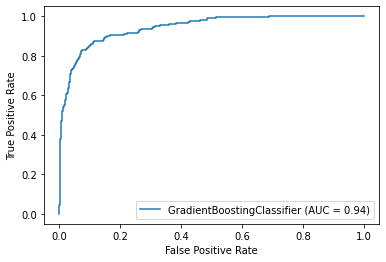


Confusion Matrix  

[[3201   42]
 [ 194  139]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.99      0.94      0.96      3395
        True       0.42      0.77      0.54       181

    accuracy                           0.93      3576
   macro avg       0.70      0.86      0.75      3576
weighted avg       0.96      0.93      0.94      3576



Prediction for GaussianNB 

Train Dataset Accuracy : 0.8285 
 Test Dataset Accuracy : 0.8255 
 ROC AUC Score         : 0.7381 



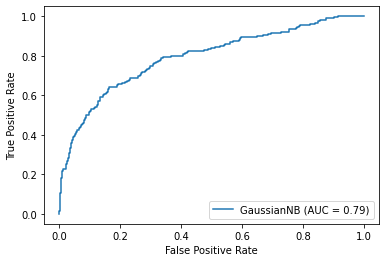


Confusion Matrix  

[[2836   65]
 [ 559  116]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.98      0.84      0.90      3395
        True       0.17      0.64      0.27       181

    accuracy                           0.83      3576
   macro avg       0.57      0.74      0.59      3576
weighted avg       0.94      0.83      0.87      3576



Prediction for LogisticRegression 

Train Dataset Accuracy : 0.6985 
 Test Dataset Accuracy : 0.8062 
 ROC AUC Score         : 0.6417 



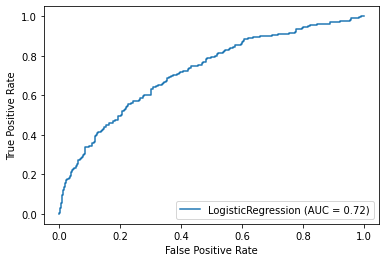


Confusion Matrix  

[[2800   98]
 [ 595   83]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.97      0.82      0.89      3395
        True       0.12      0.46      0.19       181

    accuracy                           0.81      3576
   macro avg       0.54      0.64      0.54      3576
weighted avg       0.92      0.81      0.85      3576



Prediction for KNeighborsClassifier 

Train Dataset Accuracy : 0.9943 
 Test Dataset Accuracy : 0.8345 
 ROC AUC Score         : 0.7585 



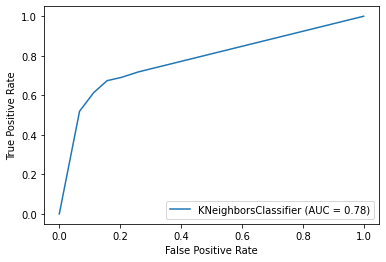


Confusion Matrix  

[[2862   59]
 [ 533  122]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.98      0.84      0.91      3395
        True       0.19      0.67      0.29       181

    accuracy                           0.83      3576
   macro avg       0.58      0.76      0.60      3576
weighted avg       0.94      0.83      0.88      3576



Prediction for RandomForestClassifier 

Train Dataset Accuracy : 1.0 
 Test Dataset Accuracy : 0.9676 
 ROC AUC Score         : 0.8731 



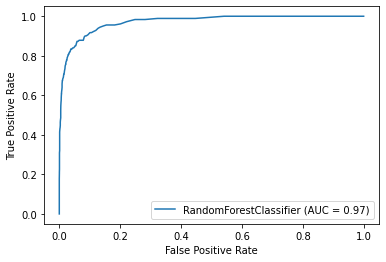


Confusion Matrix  

[[3321   42]
 [  74  139]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.99      0.98      0.98      3395
        True       0.65      0.77      0.71       181

    accuracy                           0.97      3576
   macro avg       0.82      0.87      0.84      3576
weighted avg       0.97      0.97      0.97      3576



Prediction for XGBClassifier 

Train Dataset Accuracy : 0.9498 
 Test Dataset Accuracy : 0.929 
 ROC AUC Score         : 0.8528 



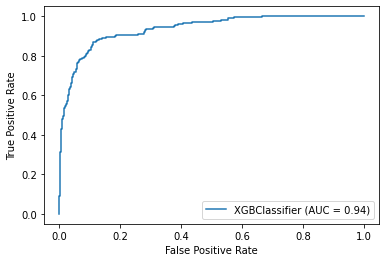


Confusion Matrix  

[[3183   42]
 [ 212  139]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.99      0.94      0.96      3395
        True       0.40      0.77      0.52       181

    accuracy                           0.93      3576
   macro avg       0.69      0.85      0.74      3576
weighted avg       0.96      0.93      0.94      3576




--------------------------------------------------------------------------------------------------------------
                                                Model Prediction Summary
--------------------------------------------------------------------------------------------------------------

+----+----------------------------+------------------+-----------------+-------------+----------+------------+
|    | Model Names                |   Train Accuracy |   Test Accuracy |   Precision |   Recall |   F1 Score |
|----+----------------------------+------------------+-----------------+--

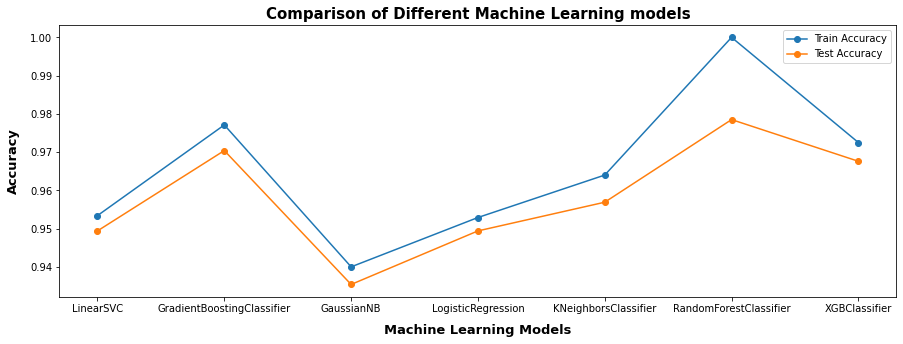

In [ ]:
## Combine - Random Under Sampling and SMOTE

from imblearn.combine import SMOTEENN
sample = SMOTEENN(sampling_strategy=0.5)

X_sm_both, y_sm_both = sample.fit_resample(X_train, y_train)


print(f'''Shape of X before SMOTE : {X.shape}
 Shape of X after SMOTE : {X_sm_both.shape}''')

print('\nBalance of positive and negative classes (%):')
print(np.sum(y_sm_both==1)/len(y_sm_both) * 100)
print(np.sum(y_sm_both==0)/len(y_sm_both) * 100)

# Convert to dataframe for this version of SMOTE (Python 3.7)
X_sm_both_df = pd.DataFrame(data=X_sm_both,columns=np.array(X.columns))
y_sm_both = np.array(y_sm_both).reshape(len(y_sm_both),)


for model in pred_models_list:
    train_both,test_both,prec_both,rec_both,f1_sc_both= model_prediction(model[1],X_sm_both_df, y_sm_both,X_test,y_test,model[0])
    Model_Pred['Train Accuracy'][i] = train_both
    Model_Pred['Test Accuracy'][i]  = test_both
    Model_Pred['Precision'] [i]     = prec_both
    Model_Pred['Recall'][i]         = rec_both
    Model_Pred['F1 Score'][i]       = f1_sc_both
    i = i+1
    

summary_graph() 



After SMOTE Oversampling - Considering all features

---------------------------------------------------


Prediction for LinearSVC 

Train Dataset Accuracy : 0.5423 
 Test Dataset Accuracy : 0.132 
 ROC AUC Score         : 0.5272 



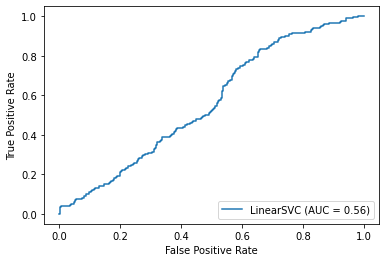


Confusion Matrix  

[[ 297    6]
 [3098  175]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.98      0.09      0.16      3395
        True       0.05      0.97      0.10       181

    accuracy                           0.13      3576
   macro avg       0.52      0.53      0.13      3576
weighted avg       0.93      0.13      0.16      3576



Prediction for GradientBoostingClassifier 

Train Dataset Accuracy : 0.9459 
 Test Dataset Accuracy : 0.9175 
 ROC AUC Score         : 0.8598 



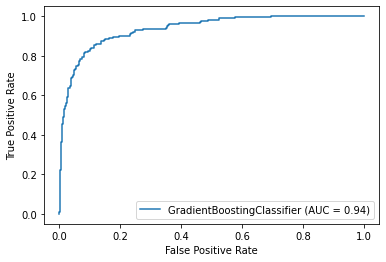


Confusion Matrix  

[[3137   37]
 [ 258  144]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.99      0.92      0.96      3395
        True       0.36      0.80      0.49       181

    accuracy                           0.92      3576
   macro avg       0.67      0.86      0.72      3576
weighted avg       0.96      0.92      0.93      3576



Prediction for GaussianNB 

Train Dataset Accuracy : 0.8058 
 Test Dataset Accuracy : 0.7822 
 ROC AUC Score         : 0.7127 



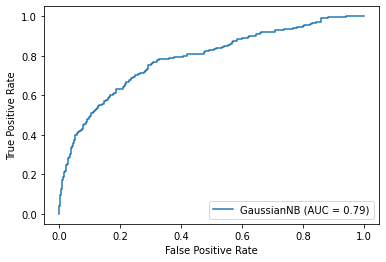


Confusion Matrix  

[[2682   66]
 [ 713  115]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.98      0.79      0.87      3395
        True       0.14      0.64      0.23       181

    accuracy                           0.78      3576
   macro avg       0.56      0.71      0.55      3576
weighted avg       0.93      0.78      0.84      3576



Prediction for LogisticRegression 

Train Dataset Accuracy : 0.6493 
 Test Dataset Accuracy : 0.6233 
 ROC AUC Score         : 0.6578 



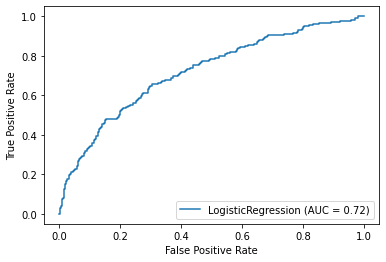


Confusion Matrix  

[[2103   55]
 [1292  126]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.97      0.62      0.76      3395
        True       0.09      0.70      0.16       181

    accuracy                           0.62      3576
   macro avg       0.53      0.66      0.46      3576
weighted avg       0.93      0.62      0.73      3576



Prediction for KNeighborsClassifier 

Train Dataset Accuracy : 0.952 
 Test Dataset Accuracy : 0.8451 
 ROC AUC Score         : 0.7327 



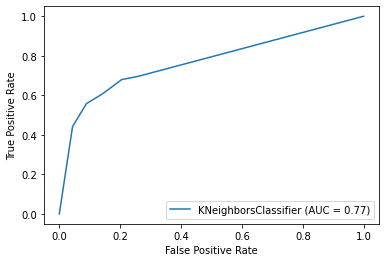


Confusion Matrix  

[[2912   71]
 [ 483  110]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.98      0.86      0.91      3395
        True       0.19      0.61      0.28       181

    accuracy                           0.85      3576
   macro avg       0.58      0.73      0.60      3576
weighted avg       0.94      0.85      0.88      3576



Prediction for RandomForestClassifier 

Train Dataset Accuracy : 1.0 
 Test Dataset Accuracy : 0.9664 
 ROC AUC Score         : 0.862 



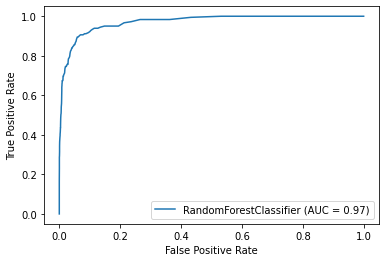


Confusion Matrix  

[[3321   46]
 [  74  135]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.99      0.98      0.98      3395
        True       0.65      0.75      0.69       181

    accuracy                           0.97      3576
   macro avg       0.82      0.86      0.84      3576
weighted avg       0.97      0.97      0.97      3576



Prediction for XGBClassifier 

Train Dataset Accuracy : 0.9448 
 Test Dataset Accuracy : 0.9125 
 ROC AUC Score         : 0.8571 



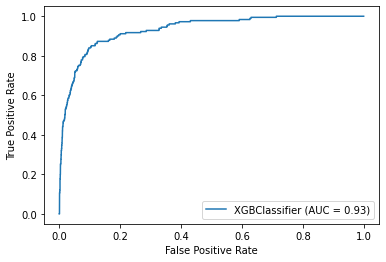


Confusion Matrix  

[[3119   37]
 [ 276  144]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.99      0.92      0.95      3395
        True       0.34      0.80      0.48       181

    accuracy                           0.91      3576
   macro avg       0.67      0.86      0.72      3576
weighted avg       0.96      0.91      0.93      3576




--------------------------------------------------------------------------------------------------------------
                                                Model Prediction Summary
--------------------------------------------------------------------------------------------------------------

+----+----------------------------+------------------+-----------------+-------------+----------+------------+
|    | Model Names                |   Train Accuracy |   Test Accuracy |   Precision |   Recall |   F1 Score |
|----+----------------------------+------------------+-----------------+--

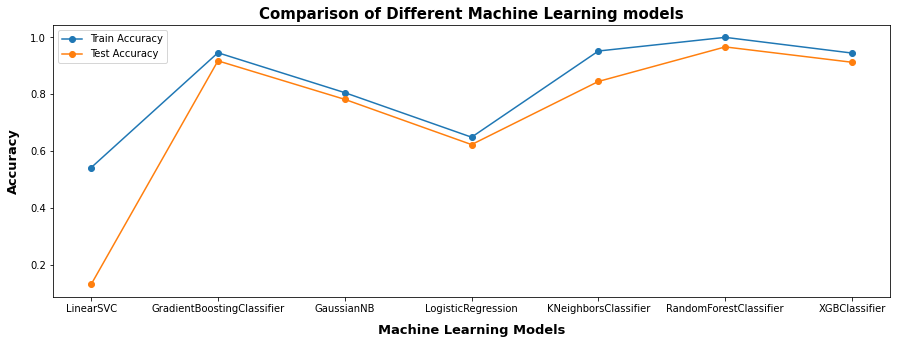

In [ ]:
print('\033[1m')
print("After SMOTE Oversampling - Considering all features")
print('\033[0m')
print("-" * 51)
print()
i = 0

for model in pred_models_list:
    train,test,prec,rec,f1_sc       = model_prediction(model[1],X_sm_df, y_sm,X_test,y_test,model[0])
    Model_Pred['Train Accuracy'][i] = train
    Model_Pred['Test Accuracy'][i]  = test
    Model_Pred['Precision'] [i]     = prec
    Model_Pred['Recall'][i]         = rec
    Model_Pred['F1 Score'][i]       = f1_sc
    i = i+1
    

summary_graph() 

### <u> **Feature Importance** </u>


As a next step, performed feature engineering using RandomForestClassifer() and XGBoostClassifier() method. Important features were extracted using the model.feature_importances_. The comparison was done by considering model performance while checking individual model’s important features and by combining both the RandomForest and XGBoostClassifier importance features. Finally, we combined the important features from both models because they performed better with a higher F1 measure.

<br>

Performed on the validation dataset for both Random Forest Classfier and Extra Trees Classifier

<br>


------------------------------------------------------------

Feature Importance using : RandomForestClassifier Classifier

------------------------------------------------------------

Confusion Matrix  

[[3390   94]
 [   5   87]]


    Recall Score : 0.9457
 Precision Score : 0.4807
  Accuracy Score : 0.9723
        F1 Score : 0.6374



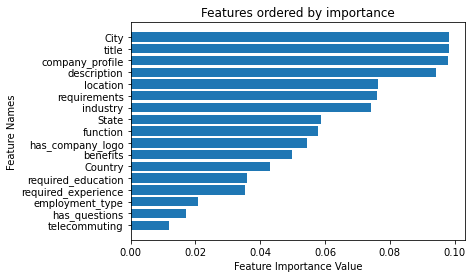


------------------------------------------------------------

Feature Importance using : XGBoost Classifier

------------------------------------------------------------

Confusion Matrix  

[[3390  113]
 [   5   68]]


    Recall Score : 0.9315
 Precision Score : 0.3757
  Accuracy Score : 0.9670
        F1 Score : 0.5354



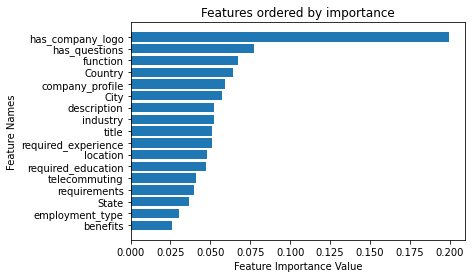

In [ ]:
# Function for retrieving the Feature Importance

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier


def get_feature_imp(X_train,y_train,X_test,y_test,model,feature_names,model_name):
       
    print('\033[1m')
    print("-" * 60)
    print(f"\nFeature Importance using : {model_name} Classifier")
    print('\033[0m')
    print("-" * 60)
    
    imp_feature=model.fit(X_train,y_train)
    y_pred=imp_feature.predict(X_test)

    print(f"\nConfusion Matrix  \n\n{confusion_matrix(y_pred,y_test)}\n\n")

    print(f"    Recall Score : {recall_score(y_pred,y_test):.4f}")
    print(f" Precision Score : {precision_score(y_pred,y_test):.4f}")
    print(f"  Accuracy Score : {accuracy_score(y_pred,y_test):.4f}")
    print(f"        F1 Score : {f1_score(y_pred,y_test):.4f}\n")
    
    
    
    
    d_imp = {'Feature Names': feature_names, 'Feature Importance': model.feature_importances_}

    importance = pd.DataFrame (d_imp)
    importance = importance.sort_values(by='Feature Importance')
    
    plt.barh("Feature Names", "Feature Importance", data = importance) 
    plt.xlabel("Feature Importance Value") 
    plt.ylabel("Feature Names") 
    plt.title("Features ordered by importance")
    
    plt.show()

model_list = [("RandomForestClassifier", RandomForestClassifier()), ("XGBoost", XGBClassifier(), ("ExtraTreeClassifier",ExtraTreesClassifier()))]
                                                  

feature_names =  np.array(X.columns)

# for model in model_list:
#     get_feature_imp(X_sm_df, y_sm.ravel(), X_test, y_test, model[1], feature_names,model[0])


for model in model_list:
    get_feature_imp(X_val, y_val, X_test, y_test, model[1], feature_names,model[0])

#### <u> **Performing Modeling & Evaluation with selected important features** </u>

Checked model performance using only the important features that were selected

<br>

#### <u> **Selected important features using Random Forest Classifier** </u>


Prediction for LinearSVC 

Train Dataset Accuracy : 0.9483 
 Test Dataset Accuracy : 0.9494 
 ROC AUC Score         : 0.5 



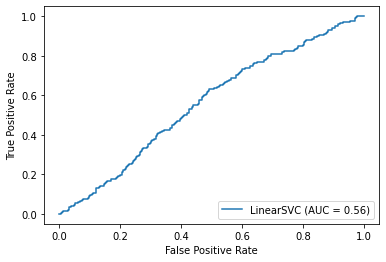


Confusion Matrix  

[[3395  181]
 [   0    0]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.95      1.00      0.97      3395
        True       0.00      0.00      0.00       181

    accuracy                           0.95      3576
   macro avg       0.47      0.50      0.49      3576
weighted avg       0.90      0.95      0.92      3576



Prediction for GradientBoostingClassifier 

Train Dataset Accuracy : 0.9779 
 Test Dataset Accuracy : 0.9692 
 ROC AUC Score         : 0.7092 



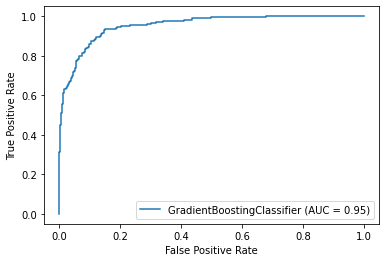


Confusion Matrix  

[[3390  105]
 [   5   76]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.97      1.00      0.98      3395
        True       0.94      0.42      0.58       181

    accuracy                           0.97      3576
   macro avg       0.95      0.71      0.78      3576
weighted avg       0.97      0.97      0.96      3576



Prediction for GaussianNB 

Train Dataset Accuracy : 0.9494 
 Test Dataset Accuracy : 0.9455 
 ROC AUC Score         : 0.5006 



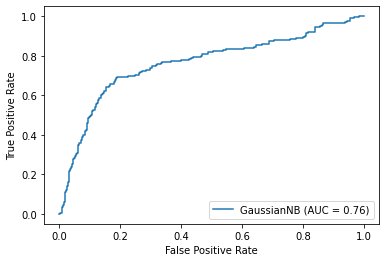


Confusion Matrix  

[[3380  180]
 [  15    1]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.95      1.00      0.97      3395
        True       0.06      0.01      0.01       181

    accuracy                           0.95      3576
   macro avg       0.51      0.50      0.49      3576
weighted avg       0.90      0.95      0.92      3576



Prediction for LogisticRegression 

Train Dataset Accuracy : 0.9477 
 Test Dataset Accuracy : 0.9491 
 ROC AUC Score         : 0.4999 



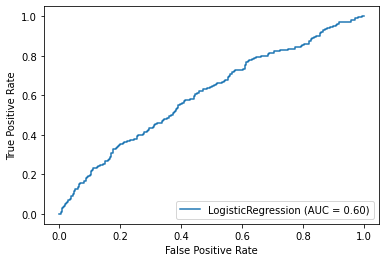


Confusion Matrix  

[[3394  181]
 [   1    0]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.95      1.00      0.97      3395
        True       0.00      0.00      0.00       181

    accuracy                           0.95      3576
   macro avg       0.47      0.50      0.49      3576
weighted avg       0.90      0.95      0.92      3576



Prediction for KNeighborsClassifier 

Train Dataset Accuracy : 0.9553 
 Test Dataset Accuracy : 0.9483 
 ROC AUC Score         : 0.5622 



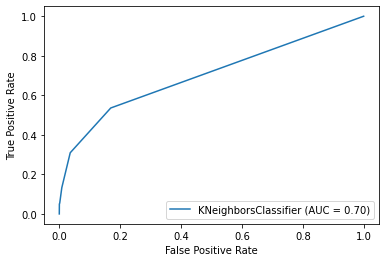


Confusion Matrix  

[[3367  157]
 [  28   24]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.96      0.99      0.97      3395
        True       0.46      0.13      0.21       181

    accuracy                           0.95      3576
   macro avg       0.71      0.56      0.59      3576
weighted avg       0.93      0.95      0.93      3576



Prediction for RandomForestClassifier 

Train Dataset Accuracy : 1.0 
 Test Dataset Accuracy : 0.9692 
 ROC AUC Score         : 0.7118 



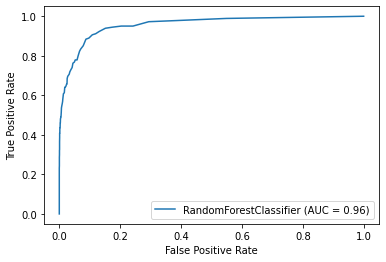


Confusion Matrix  

[[3389  104]
 [   6   77]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.97      1.00      0.98      3395
        True       0.93      0.43      0.58       181

    accuracy                           0.97      3576
   macro avg       0.95      0.71      0.78      3576
weighted avg       0.97      0.97      0.96      3576



Prediction for XGBClassifier 

Train Dataset Accuracy : 0.9684 
 Test Dataset Accuracy : 0.9611 
 ROC AUC Score         : 0.6317 



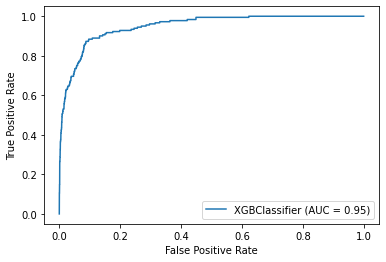


Confusion Matrix  

[[3389  133]
 [   6   48]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.96      1.00      0.98      3395
        True       0.89      0.27      0.41       181

    accuracy                           0.96      3576
   macro avg       0.93      0.63      0.69      3576
weighted avg       0.96      0.96      0.95      3576




--------------------------------------------------------------------------------------------------------------
                                                Model Prediction Summary
--------------------------------------------------------------------------------------------------------------

+----+----------------------------+------------------+-----------------+-------------+----------+------------+
|    | Model Names                |   Train Accuracy |   Test Accuracy |   Precision |   Recall |   F1 Score |
|----+----------------------------+------------------+-----------------+--

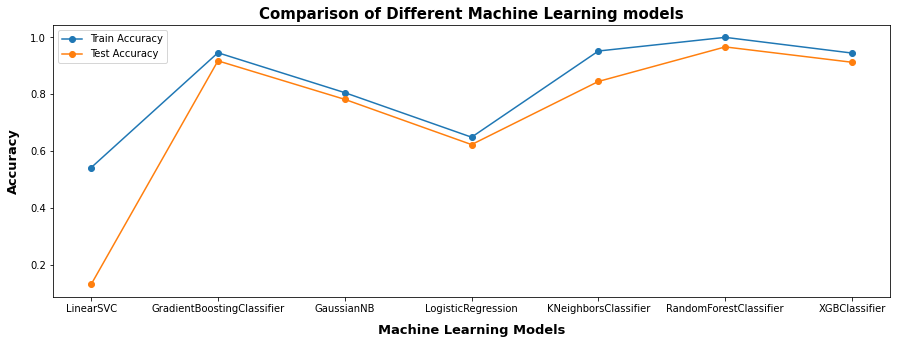

In [ ]:
# Important features using VALIDATION DATASET  & IMPORTANT FEATURES from RF

# RF 

rf_imp_features = ['City','title','description','company_profile','industry'
,'location','requirements','State','has_company_logo']

xg_imp_features = ['has_company_logo' ,'function','has_questions','Country', 
                   'company_profile','City','description','industry']




for model in pred_models_list:
    train,test,prec,rec,f1_sc       = model_prediction(model[1],X_val[rf_imp_features]
                                                       , y_val ,X_test[rf_imp_features],y_test,model[0])
    Model_Pred['Train Accuracy'][i] = train
    Model_Pred['Test Accuracy'][i]  = test
    Model_Pred['Precision'] [i]     = prec
    Model_Pred['Recall'][i]         = rec
    Model_Pred['F1 Score'][i]       = f1_sc
    i = i+1
    

summary_graph() 


#### <u> **Selected important features using XGBoost Classifier** </u>


Prediction for LinearSVC 

Train Dataset Accuracy : 0.7791 
 Test Dataset Accuracy : 0.7763 
 ROC AUC Score         : 0.5867 



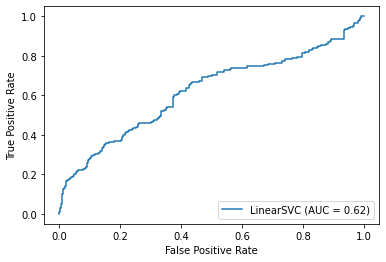


Confusion Matrix  

[[2708  113]
 [ 687   68]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.96      0.80      0.87      3395
        True       0.09      0.38      0.15       181

    accuracy                           0.78      3576
   macro avg       0.53      0.59      0.51      3576
weighted avg       0.92      0.78      0.83      3576



Prediction for GradientBoostingClassifier 

Train Dataset Accuracy : 0.9779 
 Test Dataset Accuracy : 0.9684 
 ROC AUC Score         : 0.7114 



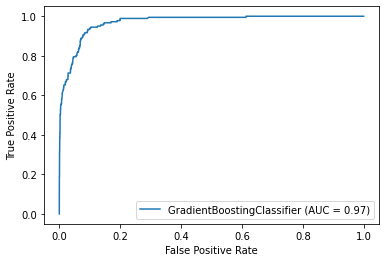


Confusion Matrix  

[[3386  104]
 [   9   77]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.97      1.00      0.98      3395
        True       0.90      0.43      0.58       181

    accuracy                           0.97      3576
   macro avg       0.93      0.71      0.78      3576
weighted avg       0.97      0.97      0.96      3576



Prediction for GaussianNB 

Train Dataset Accuracy : 0.9183 
 Test Dataset Accuracy : 0.9141 
 ROC AUC Score         : 0.6619 



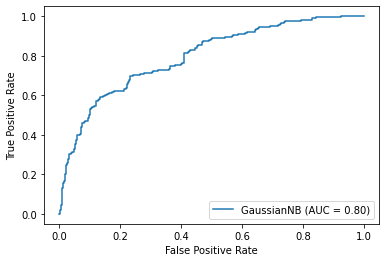


Confusion Matrix  

[[3200  112]
 [ 195   69]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.97      0.94      0.95      3395
        True       0.26      0.38      0.31       181

    accuracy                           0.91      3576
   macro avg       0.61      0.66      0.63      3576
weighted avg       0.93      0.91      0.92      3576



Prediction for LogisticRegression 

Train Dataset Accuracy : 0.9483 
 Test Dataset Accuracy : 0.9494 
 ROC AUC Score         : 0.5 



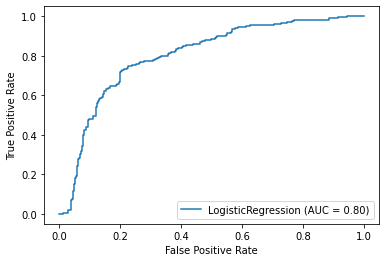


Confusion Matrix  

[[3395  181]
 [   0    0]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.95      1.00      0.97      3395
        True       0.00      0.00      0.00       181

    accuracy                           0.95      3576
   macro avg       0.47      0.50      0.49      3576
weighted avg       0.90      0.95      0.92      3576



Prediction for KNeighborsClassifier 

Train Dataset Accuracy : 0.9541 
 Test Dataset Accuracy : 0.9527 
 ROC AUC Score         : 0.5933 



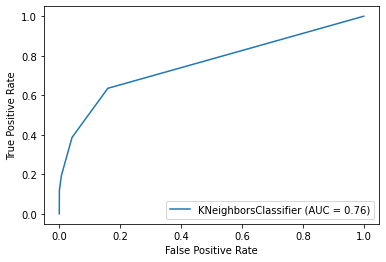


Confusion Matrix  

[[3372  146]
 [  23   35]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.96      0.99      0.98      3395
        True       0.60      0.19      0.29       181

    accuracy                           0.95      3576
   macro avg       0.78      0.59      0.63      3576
weighted avg       0.94      0.95      0.94      3576



Prediction for RandomForestClassifier 

Train Dataset Accuracy : 1.0 
 Test Dataset Accuracy : 0.9723 
 ROC AUC Score         : 0.7579 



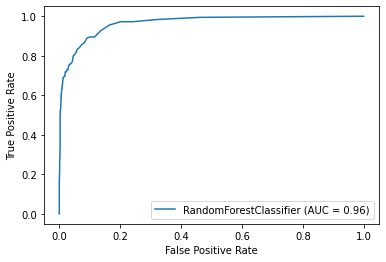


Confusion Matrix  

[[3383   87]
 [  12   94]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.97      1.00      0.99      3395
        True       0.89      0.52      0.66       181

    accuracy                           0.97      3576
   macro avg       0.93      0.76      0.82      3576
weighted avg       0.97      0.97      0.97      3576



Prediction for XGBClassifier 

Train Dataset Accuracy : 0.9687 
 Test Dataset Accuracy : 0.9625 
 ROC AUC Score         : 0.6586 



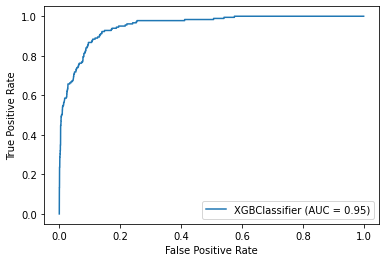


Confusion Matrix  

[[3384  123]
 [  11   58]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.96      1.00      0.98      3395
        True       0.84      0.32      0.46       181

    accuracy                           0.96      3576
   macro avg       0.90      0.66      0.72      3576
weighted avg       0.96      0.96      0.95      3576




--------------------------------------------------------------------------------------------------------------
                                                Model Prediction Summary
--------------------------------------------------------------------------------------------------------------

+----+----------------------------+------------------+-----------------+-------------+----------+------------+
|    | Model Names                |   Train Accuracy |   Test Accuracy |   Precision |   Recall |   F1 Score |
|----+----------------------------+------------------+-----------------+--

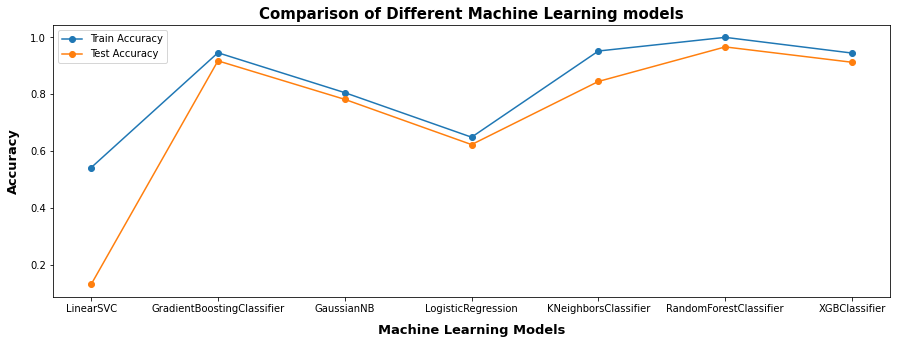

In [ ]:
# Important features using VALIDATION DATASET  & IMPORTANT FEATURES from XG


for model in pred_models_list:
    train,test,prec,rec,f1_sc       = model_prediction(model[1],X_val[xg_imp_features]
                                                       , y_val ,X_test[xg_imp_features],y_test,model[0])
    Model_Pred['Train Accuracy'][i] = train
    Model_Pred['Test Accuracy'][i]  = test
    Model_Pred['Precision'] [i]     = prec
    Model_Pred['Recall'][i]         = rec
    Model_Pred['F1 Score'][i]       = f1_sc
    i = i+1
    

summary_graph() 


#### <u> **Selected important features combining both Random Forest and XGBoost Classifier - Intersection of features** </u>


Prediction for LinearSVC 

Train Dataset Accuracy : 0.9483 
 Test Dataset Accuracy : 0.9494 
 ROC AUC Score         : 0.5 



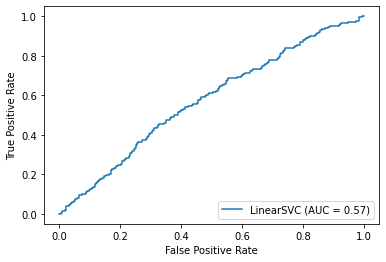


Confusion Matrix  

[[3395  181]
 [   0    0]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.95      1.00      0.97      3395
        True       0.00      0.00      0.00       181

    accuracy                           0.95      3576
   macro avg       0.47      0.50      0.49      3576
weighted avg       0.90      0.95      0.92      3576



Prediction for GradientBoostingClassifier 

Train Dataset Accuracy : 0.9801 
 Test Dataset Accuracy : 0.9681 
 ROC AUC Score         : 0.7034 



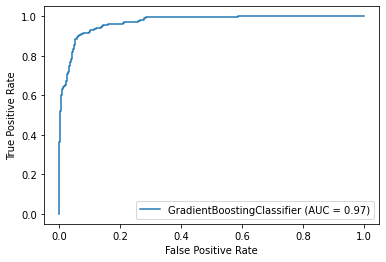


Confusion Matrix  

[[3388  107]
 [   7   74]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.97      1.00      0.98      3395
        True       0.91      0.41      0.56       181

    accuracy                           0.97      3576
   macro avg       0.94      0.70      0.77      3576
weighted avg       0.97      0.97      0.96      3576



Prediction for GaussianNB 

Train Dataset Accuracy : 0.9203 
 Test Dataset Accuracy : 0.9141 
 ROC AUC Score         : 0.6567 



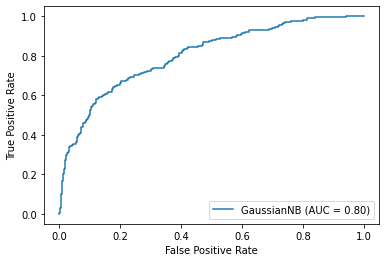


Confusion Matrix  

[[3202  114]
 [ 193   67]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.97      0.94      0.95      3395
        True       0.26      0.37      0.30       181

    accuracy                           0.91      3576
   macro avg       0.61      0.66      0.63      3576
weighted avg       0.93      0.91      0.92      3576



Prediction for LogisticRegression 

Train Dataset Accuracy : 0.948 
 Test Dataset Accuracy : 0.9491 
 ROC AUC Score         : 0.5025 



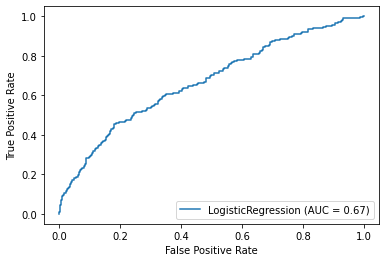


Confusion Matrix  

[[3393  180]
 [   2    1]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.95      1.00      0.97      3395
        True       0.33      0.01      0.01       181

    accuracy                           0.95      3576
   macro avg       0.64      0.50      0.49      3576
weighted avg       0.92      0.95      0.93      3576



Prediction for KNeighborsClassifier 

Train Dataset Accuracy : 0.9553 
 Test Dataset Accuracy : 0.9483 
 ROC AUC Score         : 0.5622 



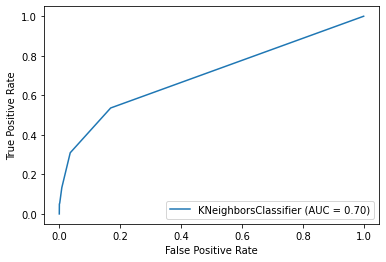


Confusion Matrix  

[[3367  157]
 [  28   24]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.96      0.99      0.97      3395
        True       0.46      0.13      0.21       181

    accuracy                           0.95      3576
   macro avg       0.71      0.56      0.59      3576
weighted avg       0.93      0.95      0.93      3576



Prediction for RandomForestClassifier 

Train Dataset Accuracy : 1.0 
 Test Dataset Accuracy : 0.9692 
 ROC AUC Score         : 0.7144 



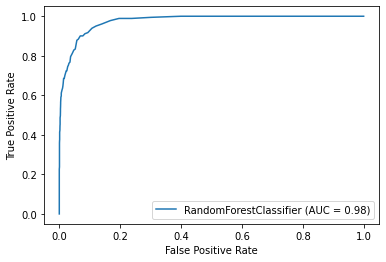


Confusion Matrix  

[[3388  103]
 [   7   78]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.97      1.00      0.98      3395
        True       0.92      0.43      0.59       181

    accuracy                           0.97      3576
   macro avg       0.94      0.71      0.79      3576
weighted avg       0.97      0.97      0.96      3576



Prediction for XGBClassifier 

Train Dataset Accuracy : 0.9709 
 Test Dataset Accuracy : 0.9642 
 ROC AUC Score         : 0.6516 



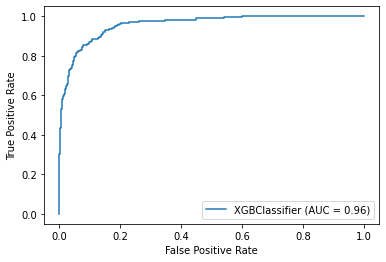


Confusion Matrix  

[[3393  126]
 [   2   55]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.96      1.00      0.98      3395
        True       0.96      0.30      0.46       181

    accuracy                           0.96      3576
   macro avg       0.96      0.65      0.72      3576
weighted avg       0.96      0.96      0.96      3576




--------------------------------------------------------------------------------------------------------------
                                                Model Prediction Summary
--------------------------------------------------------------------------------------------------------------

+----+----------------------------+------------------+-----------------+-------------+----------+------------+
|    | Model Names                |   Train Accuracy |   Test Accuracy |   Precision |   Recall |   F1 Score |
|----+----------------------------+------------------+-----------------+--

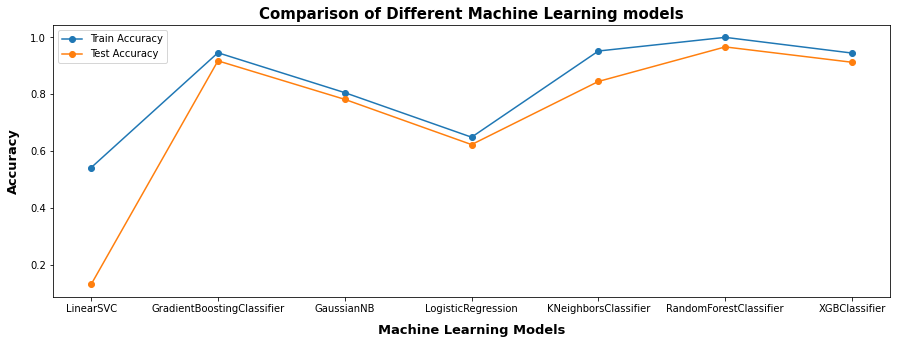

In [ ]:
# Important features using VALIDATION DATASET  & COMBINED FEATURES from XG and RF

combo_imp_features = ['City','title','description','company_profile','industry'
,'location','requirements','State','has_company_logo','function','has_questions','Country']


for model in pred_models_list:
    train,test,prec,rec,f1_sc = model_prediction(model[1],X_val[combo_imp_features]
                                                       , y_val ,X_test[combo_imp_features],y_test,model[0])
    Model_Pred['Train Accuracy'][i] = train
    Model_Pred['Test Accuracy'][i]  = test
    Model_Pred['Precision'] [i]     = prec
    Model_Pred['Recall'][i]         = rec
    Model_Pred['F1 Score'][i]       = f1_sc
    i = i+1
    

summary_graph() 


#### <u> **Selected important features combining both Random Forest and XGBoost Classifier - UNION of features** </u>

In [ ]:
# From XGBoost Feature Importance
# imp_features = ['has_company_logo','has_questions'
#                 ,'company_profile','required_education','function','Country'
#                 ,'required_experience']


# From Random Forest Feature Importance
# imp_features = ['has_company_logo' ,'company_profile','required_education','function','has_questions','requirements'
#                 ,'industry']

# Intersection: XGBoost and Random Forest Feature Importance
# imp_features = ['has_company_logo' ,'company_profile','required_education','function','has_questions']

# Union: XGBoost and Random Forest Feature Importance
imp_features = ['has_company_logo' ,'company_profile','required_education','function','has_questions'
                ,'Country', 'required_experience','requirements','industry']


X_imp = Fraud_Job_df[imp_features]
y_imp = Fraud_Job_df[['fraudulent']]

#### <u> **Sampling with only selected features and checking performance** </u>

In [ ]:
# Sample data again with selecting only IMPORTANT FEATURES
from sklearn.model_selection import train_test_split


X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(
    X_imp, y_imp, test_size=0.25, random_state=42
)

print(f'''% Positive class in Train = {np.round(y_train_imp.value_counts(normalize=True)[1] * 100, 2)}
\n% Positive class in Test  = {np.round(y_test_imp.value_counts(normalize=True)[1] * 100, 2)}''')

% Positive class in Train = fraudulent
True          4.79
dtype: float64

% Positive class in Test  = fraudulent
True          4.99
dtype: float64


In [ ]:
from imblearn.over_sampling import SMOTE 

sm_imp = SMOTE(random_state=42)

# X_sm, y_sm = sm.fit_resample(np.array(X_train).ravel(), np.array(y_train).ravel())
X_sm_imp, y_sm_imp = sm_imp.fit_resample(X_train_imp, y_train_imp)


print(f'''Shape of X before SMOTE : {X_imp.shape}
 Shape of X after SMOTE : {X_sm_imp.shape}''')

print('\nBalance of positive and negative classes (%):')
print(np.sum(y_sm_imp==1)/len(y_sm_imp) * 100)
print(np.sum(y_sm_imp==0)/len(y_sm_imp) * 100)

# Convert to dataframe for this version of SMOTE (Python 3.7)
X_sm_imp_df = pd.DataFrame(data=X_sm_imp,columns=np.array(X_test_imp.columns))
y_sm_imp = np.array(y_sm_imp).reshape(len(y_sm_imp),)

Shape of X before SMOTE : (17880, 9)
 Shape of X after SMOTE : (25534, 9)

Balance of positive and negative classes (%):
50.0
50.0



After Selecting Important Features

---------------------------------------------------


Prediction for LinearSVC 

Train Dataset Accuracy : 0.526 
 Test Dataset Accuracy : 0.1094 
 ROC AUC Score         : 0.5249 



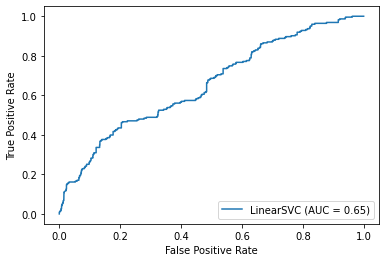


Confusion Matrix  

[[ 269    3]
 [3978  220]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.99      0.06      0.12      4247
        True       0.05      0.99      0.10       223

    accuracy                           0.11      4470
   macro avg       0.52      0.52      0.11      4470
weighted avg       0.94      0.11      0.12      4470



Prediction for GradientBoostingClassifier 

Train Dataset Accuracy : 0.9283 
 Test Dataset Accuracy : 0.896 
 ROC AUC Score         : 0.8773 



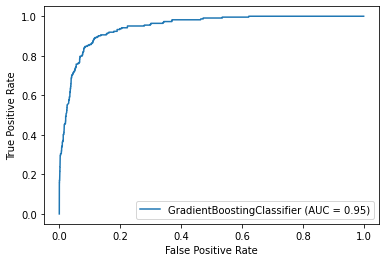


Confusion Matrix  

[[3814   32]
 [ 433  191]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.99      0.90      0.94      4247
        True       0.31      0.86      0.45       223

    accuracy                           0.90      4470
   macro avg       0.65      0.88      0.70      4470
weighted avg       0.96      0.90      0.92      4470



Prediction for GaussianNB 

Train Dataset Accuracy : 0.7474 
 Test Dataset Accuracy : 0.7394 
 ROC AUC Score         : 0.7226 



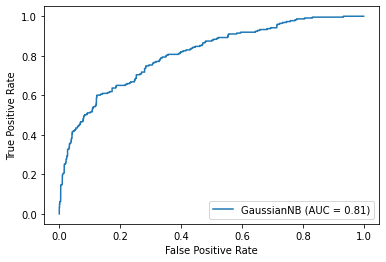


Confusion Matrix  

[[3148   66]
 [1099  157]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.98      0.74      0.84      4247
        True       0.12      0.70      0.21       223

    accuracy                           0.74      4470
   macro avg       0.55      0.72      0.53      4470
weighted avg       0.94      0.74      0.81      4470



Prediction for LogisticRegression 

Train Dataset Accuracy : 0.685 
 Test Dataset Accuracy : 0.6477 
 ROC AUC Score         : 0.6744 



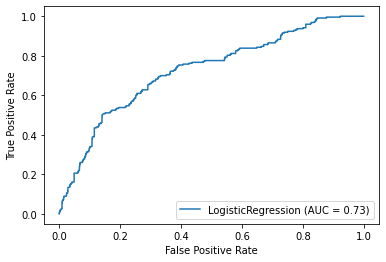


Confusion Matrix  

[[2738   66]
 [1509  157]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.98      0.64      0.78      4247
        True       0.09      0.70      0.17       223

    accuracy                           0.65      4470
   macro avg       0.54      0.67      0.47      4470
weighted avg       0.93      0.65      0.75      4470



Prediction for KNeighborsClassifier 

Train Dataset Accuracy : 0.9562 
 Test Dataset Accuracy : 0.8926 
 ROC AUC Score         : 0.8309 



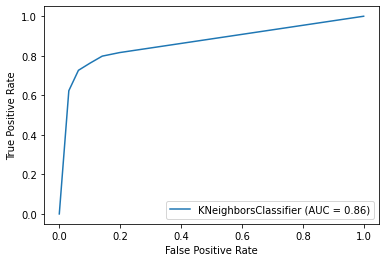


Confusion Matrix  

[[3820   53]
 [ 427  170]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.99      0.90      0.94      4247
        True       0.28      0.76      0.41       223

    accuracy                           0.89      4470
   macro avg       0.64      0.83      0.68      4470
weighted avg       0.95      0.89      0.91      4470



Prediction for RandomForestClassifier 

Train Dataset Accuracy : 0.9979 
 Test Dataset Accuracy : 0.9615 
 ROC AUC Score         : 0.8693 



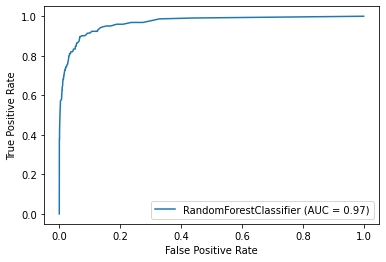


Confusion Matrix  

[[4127   52]
 [ 120  171]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.99      0.97      0.98      4247
        True       0.59      0.77      0.67       223

    accuracy                           0.96      4470
   macro avg       0.79      0.87      0.82      4470
weighted avg       0.97      0.96      0.96      4470



Prediction for XGBClassifier 

Train Dataset Accuracy : 0.927 
 Test Dataset Accuracy : 0.8924 
 ROC AUC Score         : 0.8754 



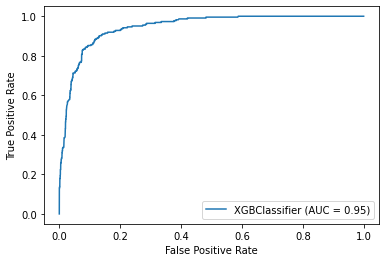


Confusion Matrix  

[[3798   32]
 [ 449  191]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.99      0.89      0.94      4247
        True       0.30      0.86      0.44       223

    accuracy                           0.89      4470
   macro avg       0.65      0.88      0.69      4470
weighted avg       0.96      0.89      0.92      4470




--------------------------------------------------------------------------------------------------------------
                                                Model Prediction Summary
--------------------------------------------------------------------------------------------------------------

+----+----------------------------+------------------+-----------------+-------------+----------+------------+
|    | Model Names                |   Train Accuracy |   Test Accuracy |   Precision |   Recall |   F1 Score |
|----+----------------------------+------------------+-----------------+--

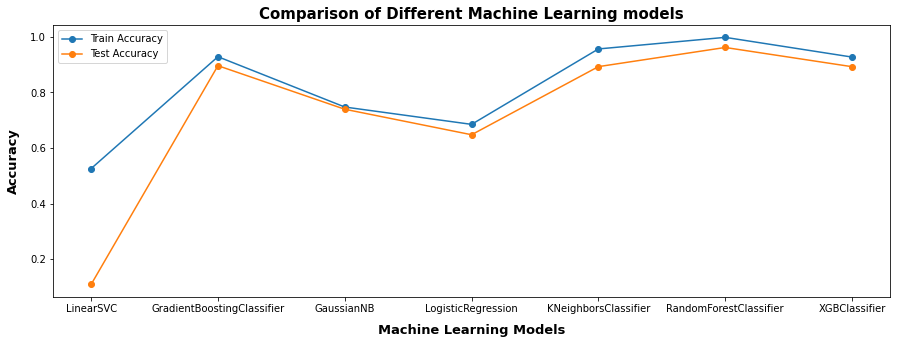

In [ ]:
print('\033[1m')
print("After Selecting Important Features")
print('\033[0m')
print("-" * 51)
print()
i = 0

for model in pred_models_list:
    train,test,prec,rec,f1_sc       = model_prediction(model[1],X_sm_imp_df, y_sm_imp,X_test_imp,y_test_imp,model[0])
    Model_Pred['Train Accuracy'][i] = train
    Model_Pred['Test Accuracy'][i]  = test
    Model_Pred['Precision'] [i]     = prec
    Model_Pred['Recall'][i]         = rec
    Model_Pred['F1 Score'][i]       = f1_sc
    i = i+1

summary_graph() 

### <u> **Hyperparameter Optimization** </u>

Random Forest model has performed the best until now.


The next challenge is to improve the performance by finding the most optimum hyperparameters that will give the best output. This is called Hyperparameter optimization. 
The validation dataset was used along with nested k-fold validation to check for the optimum hyperparameters. Below are the hyperparameters that were tuned for the RF model.



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


#### <b> <u>K-fold Cross validation; k =5 ; to check for optimal hyperparameters</u> </b>


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid
                               , n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_val, y_val)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

#### <u> **Best parameters are found for k=5!** </u>

Best parameters are as below

In [ ]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 2000}

#### <u> **Evaluate model with best hyperparameters + all features** </u>

Evaluate the model with the best parameters chosen - using all features


Prediction for Tuned model

Train Dataset Accuracy : 0.9745 
 Test Dataset Accuracy : 0.9732 
 ROC AUC Score         : 0.7531 



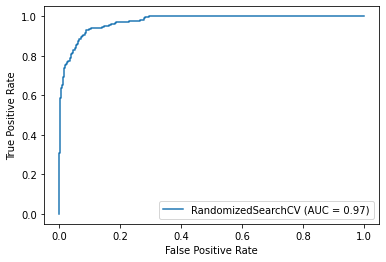


Confusion Matrix  

[[3388   89]
 [   7   92]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.97      1.00      0.99      3395
        True       0.93      0.51      0.66       181

    accuracy                           0.97      3576
   macro avg       0.95      0.75      0.82      3576
weighted avg       0.97      0.97      0.97      3576




In [ ]:

print('\033[1m')
print(f"Prediction for Tuned model")
print('\033[0m')

train_fit = rf_random.predict(X_train)
test_fit  = rf_random.predict(X_test)

train_accuracy = round(accuracy_score(train_fit,y_train),4)
test_accuracy  = round(accuracy_score(test_fit,y_test),4)
precision      = round(precision_score(test_fit,y_test),4)
recall         = round(recall_score(test_fit,y_test),4)
f1             = round(f1_score(test_fit,y_test),4)

roc_auc        = round(roc_auc_score(y_test,test_fit),4)

print(f"Train Dataset Accuracy : {train_accuracy} ")
print(f" Test Dataset Accuracy : {test_accuracy} ")
print(f" ROC AUC Score         : {roc_auc} \n")

metrics.plot_roc_curve(rf_random, X_test, y_test) 
plt.show()  

print(f"\nConfusion Matrix  \n\n{confusion_matrix(test_fit,y_test)}\n\n")

print(f"\n Classification Report : \n")
print(classification_report(y_test,test_fit))


print()

#### <b><u>K-fold Cross validation; k =10 ; to check for optimal hyperparameters</u></b>
<br>

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf_imp = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random_imp = RandomizedSearchCV(estimator = rf_imp, param_distributions = random_grid
                               , n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random_imp.fit(X_val[combo_imp_features], y_val)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  6.6min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

#### <u> **Best parameters are found for k=10!** </u>

Best parameters are as below

In [ ]:
rf_random_imp.best_params_

{'bootstrap': False,
 'max_depth': 80,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 1000}

#### <u> **Evaluate model with best hyperparameters + all features** </u>

Evaluate the model with the best parameters chosen - using all features


Prediction for Tuned model WITH IMPORTANT FEATURES ONLY

Train Dataset Accuracy : 0.972 
 Test Dataset Accuracy : 0.9698 
 ROC AUC Score         : 0.7226 



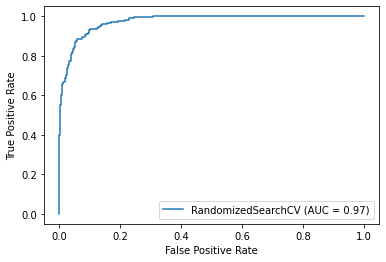


Confusion Matrix  

[[3387  100]
 [   8   81]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.97      1.00      0.98      3395
        True       0.91      0.45      0.60       181

    accuracy                           0.97      3576
   macro avg       0.94      0.72      0.79      3576
weighted avg       0.97      0.97      0.96      3576




In [ ]:

print('\033[1m')
print(f"Prediction for Tuned model WITH IMPORTANT FEATURES ONLY")
print('\033[0m')

train_fit = rf_random_imp.predict(X_train[combo_imp_features])
test_fit  = rf_random_imp.predict(X_test[combo_imp_features])

train_accuracy = round(accuracy_score(train_fit,y_train),4)
test_accuracy  = round(accuracy_score(test_fit,y_test),4)
precision      = round(precision_score(test_fit,y_test),4)
recall         = round(recall_score(test_fit,y_test),4)
f1             = round(f1_score(test_fit,y_test),4)

roc_auc        = round(roc_auc_score(y_test,test_fit),4)

print(f"Train Dataset Accuracy : {train_accuracy} ")
print(f" Test Dataset Accuracy : {test_accuracy} ")
print(f" ROC AUC Score         : {roc_auc} \n")

metrics.plot_roc_curve(rf_random_imp, X_test[combo_imp_features], y_test) 
plt.show()  

print(f"\nConfusion Matrix  \n\n{confusion_matrix(test_fit,y_test)}\n\n")

print(f"\n Classification Report : \n")
print(classification_report(y_test,test_fit))


print()

<br>

Predict with all features on the tuned model

<br>


Prediction for Tuned model WITH ALL FEATURES

Train Dataset Accuracy : 0.9745 
 Test Dataset Accuracy : 0.9732 
 ROC AUC Score         : 0.7531 



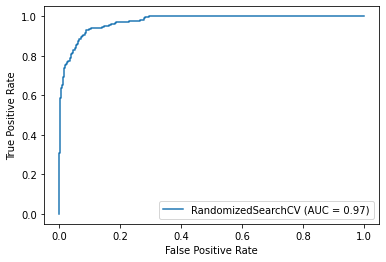


Confusion Matrix  

[[3388   89]
 [   7   92]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.97      1.00      0.99      3395
        True       0.93      0.51      0.66       181

    accuracy                           0.97      3576
   macro avg       0.95      0.75      0.82      3576
weighted avg       0.97      0.97      0.97      3576




In [ ]:
# rf_random.predict(X_test,y_test)

# y_pred=rf_random.predict(X_test)

# model_fitted = model.fit(X_train, y_array)
print('\033[1m')
print(f"Prediction for Tuned model WITH ALL FEATURES")
print('\033[0m')

train_fit = rf_random.predict(X_train)
test_fit  = rf_random.predict(X_test)

train_accuracy = round(accuracy_score(train_fit,y_train),4)
test_accuracy  = round(accuracy_score(test_fit,y_test),4)
precision      = round(precision_score(test_fit,y_test),4)
recall         = round(recall_score(test_fit,y_test),4)
f1             = round(f1_score(test_fit,y_test),4)

roc_auc        = round(roc_auc_score(y_test,test_fit),4)

print(f"Train Dataset Accuracy : {train_accuracy} ")
print(f" Test Dataset Accuracy : {test_accuracy} ")
print(f" ROC AUC Score         : {roc_auc} \n")

metrics.plot_roc_curve(rf_random, X_test, y_test) 
plt.show()  

print(f"\nConfusion Matrix  \n\n{confusion_matrix(test_fit,y_test)}\n\n")

print(f"\n Classification Report : \n")
print(classification_report(y_test,test_fit))


print()

## <u> <b>Final Model Evaluation</b> </u>


Model evaluation has been done using optimized hyperparameters

#### <u> **Evaluate final model with TUNED hyperparameters + ALL features** </u>



Prediction for FINAL Tuned model WITH ALL FEATURES & TUNED PARAMETER

Train Dataset Accuracy : 0.9993 
 Test Dataset Accuracy : 0.979 
 ROC AUC Score         : 0.8164 



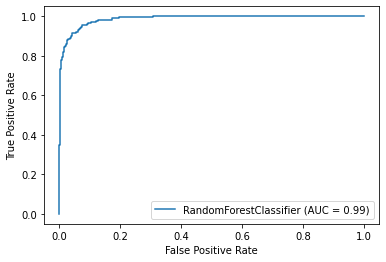


Confusion Matrix  

[[3386   66]
 [   9  115]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.98      1.00      0.99      3395
        True       0.93      0.64      0.75       181

    accuracy                           0.98      3576
   macro avg       0.95      0.82      0.87      3576
weighted avg       0.98      0.98      0.98      3576




In [ ]:

# 'bootstrap': False,
#  'max_depth': 50,
#  'max_features': 'auto',
#  'min_samples_leaf': 2,
#  'min_samples_split': 2,
#  'n_estimators': 2000

rf_tuned = RandomForestClassifier(bootstrap=False, max_depth=80, max_features='auto',
                                  min_samples_leaf=1, min_samples_split=10,
                                  n_estimators=1000)


rf_tuned = RandomForestClassifier(bootstrap=False, max_depth=80, max_features='auto',
                                  min_samples_leaf=1, min_samples_split=10,
                                  n_estimators=1000)



rf_tuned.fit(X_train, y_train)

# model_fitted = model.fit(X_train, y_array)
print('\033[1m')
print(f"Prediction for FINAL Tuned model WITH ALL FEATURES & TUNED PARAMETER")
print('\033[0m')

train_fit = rf_tuned.predict(X_train)
test_fit  = rf_tuned.predict(X_test)

train_accuracy = round(accuracy_score(train_fit,y_train),4)
test_accuracy  = round(accuracy_score(test_fit,y_test),4)
precision      = round(precision_score(test_fit,y_test),4)
recall         = round(recall_score(test_fit,y_test),4)
f1             = round(f1_score(test_fit,y_test),4)

roc_auc        = round(roc_auc_score(y_test,test_fit),4)

print(f"Train Dataset Accuracy : {train_accuracy} ")
print(f" Test Dataset Accuracy : {test_accuracy} ")
print(f" ROC AUC Score         : {roc_auc} \n")

metrics.plot_roc_curve(rf_tuned, X_test, y_test) 
plt.show()  

print(f"\nConfusion Matrix  \n\n{confusion_matrix(test_fit,y_test)}\n\n")

print(f"\n Classification Report : \n")
print(classification_report(y_test,test_fit))


print()

#### <u> **Evaluate final model with TUNED hyperparameters + IMPORTANT features** </u>



Prediction for FINAL Tuned model WITH IMPORTANT FEATURES & TUNED PARAMETER

Train Dataset Accuracy : 0.9952 
 Test Dataset Accuracy : 0.9803 
 ROC AUC Score         : 0.8303 



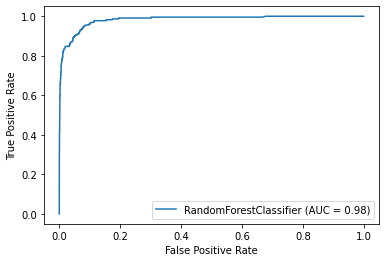


Confusion Matrix  

[[4234   75]
 [  13  148]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.98      1.00      0.99      4247
        True       0.92      0.66      0.77       223

    accuracy                           0.98      4470
   macro avg       0.95      0.83      0.88      4470
weighted avg       0.98      0.98      0.98      4470




In [ ]:

# 'bootstrap': False,
#  'max_depth': 50,
#  'max_features': 'auto',
#  'min_samples_leaf': 2,
#  'min_samples_split': 2,
#  'n_estimators': 2000

rf_tuned = RandomForestClassifier(bootstrap=False, max_depth=80, max_features='auto',
                                  min_samples_leaf=1, min_samples_split=10,
                                  n_estimators=1000)


rf_tuned.fit(X_train_imp, y_train_imp)

print('\033[1m')
print(f"Prediction for FINAL Tuned model WITH IMPORTANT FEATURES & TUNED PARAMETER")
print('\033[0m')

train_fit = rf_tuned.predict(X_train_imp)
test_fit  = rf_tuned.predict(X_test_imp)

train_accuracy = round(accuracy_score(train_fit,y_train_imp),4)
test_accuracy  = round(accuracy_score(test_fit,y_test_imp),4)
precision      = round(precision_score(test_fit,y_test_imp),4)
recall         = round(recall_score(test_fit,y_test_imp),4)
f1             = round(f1_score(test_fit,y_test_imp),4)

roc_auc        = round(roc_auc_score(y_test_imp,test_fit),4)

print(f"Train Dataset Accuracy : {train_accuracy} ")
print(f" Test Dataset Accuracy : {test_accuracy} ")
print(f" ROC AUC Score         : {roc_auc} \n")

metrics.plot_roc_curve(rf_tuned, X_test_imp, y_test_imp) 
plt.show()  

print(f"\nConfusion Matrix  \n\n{confusion_matrix(test_fit,y_test_imp)}\n\n")

print(f"\n Classification Report : \n")
print(classification_report(y_test_imp,test_fit))


print()


Prediction for FINAL Tuned model WITH IMPORTANT FEATURES & TUNED PARAMETER

Train Dataset Accuracy : 1.0 
 Test Dataset Accuracy : 0.9787 
 ROC AUC Score         : 0.8162 



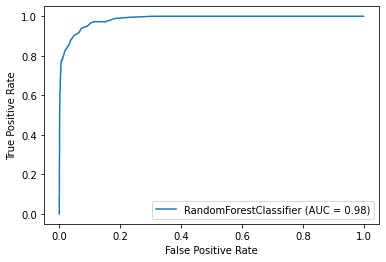


Confusion Matrix  

[[3385   66]
 [  10  115]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.98      1.00      0.99      3395
        True       0.92      0.64      0.75       181

    accuracy                           0.98      3576
   macro avg       0.95      0.82      0.87      3576
weighted avg       0.98      0.98      0.98      3576




In [ ]:

# 'bootstrap': False,
#  'max_depth': 50,
#  'max_features': 'auto',
#  'min_samples_leaf': 2,
#  'min_samples_split': 2,
#  'n_estimators': 2000

rf_default = RandomForestClassifier()


rf_default.fit(X_train, y_train)

# model_fitted = model.fit(X_train, y_array)
print('\033[1m')
print(f"Prediction for FINAL Tuned model WITH IMPORTANT FEATURES & TUNED PARAMETER")
print('\033[0m')

train_fit = rf_default.predict(X_train)
test_fit  = rf_default.predict(X_test)

train_accuracy = round(accuracy_score(train_fit,y_train),4)
test_accuracy  = round(accuracy_score(test_fit,y_test),4)
precision      = round(precision_score(test_fit,y_test),4)
recall         = round(recall_score(test_fit,y_test),4)
f1             = round(f1_score(test_fit,y_test),4)

roc_auc        = round(roc_auc_score(y_test,test_fit),4)

print(f"Train Dataset Accuracy : {train_accuracy} ")
print(f" Test Dataset Accuracy : {test_accuracy} ")
print(f" ROC AUC Score         : {roc_auc} \n")

metrics.plot_roc_curve(rf_default, X_test, y_test) 
plt.show()  

print(f"\nConfusion Matrix  \n\n{confusion_matrix(test_fit,y_test)}\n\n")

print(f"\n Classification Report : \n")
print(classification_report(y_test,test_fit))


print()



---



## <u> <b>Conclusion & Summary</b> </u>


> Random Forest Classifier performed the best with a F1 score of 0.76 With All Features & Tuned Parameter

> Random Forest Classifier performed the best with a F1 score of 0.78 while using important features selected and tuned Hyper parameters

**Selected Important Features:**

['has_company_logo','company_profile','required_education',
'function','has_questions’ ,'Country', 'required_experience','requirements','industry']

**Optimal Hyperparameters:**

 {'bootstrap': False, 'max_depth': 50, 'max_features': 'auto', 'min_samples_leaf': 2,'min_samples_split': 2, 'n_estimators': 2000}


------

In [ ]:
!python -V

Python 3.7.10
